# **National Health Services (NHS) Data Analysis Project**



## **Background**



National Health Service or NHS, a publicly funded healthcare system in England, has asked to refine the business questions to actionable analytic questions based on your review of the available data. These data include internal and external data and a number of high-level business questions concerning the utilisation of services, missed appointments, and the potential value of using external data sources such as Twitter (now rebranded as X). My mission as Data Analyst of this project is to explore the available data and offer suggestions and recommendations based on my observations.

Some stakeholders feel that the NHS’s capacity should be increased while others feel that, based on current trends in utilisation, the current capacity is adequate and that efforts to make better use of existing infrastructure and resources are sufficient. ”The government needs a data-informed approach to decide how best to handle this problem. At this stage of the project, the two main questions posed by the NHS are:

**1.	Has there been adequate staff and capacity in the networks?** \
**2.	What was the actual utilisation of resources?**
The analysis tool will be Python, the Data Analyst will explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making.


## **Data Analysis Approach**



**1. Data Exploration:**

**Metadata Review:** Begin with a thorough review of the metadata_nhs.txt file to understand the structure, content, and relationships between the datasets (actual_duration.csv, appointments_regioal.csv, and national_categories.csv).\
**Data Loading:** Load all three CSV files into Pandas DataFrames.\
**Data Overview:** Perform initial data inspection, including data types, missing values, and basic statistics for each dataset.

**2. Data Cleaning:**

**Missing Data:** Identify and handle missing values, ensuring no critical data is lost.\
**Data Integration:** Merge datasets where appropriate to facilitate comprehensive analysis

**3. Data Analysis:**

**Capacity and Staffing Analysis:**
Assess the available data across locations and service settings. Identify patterns of capacity utilization, focusing on different periods (weekdays, seasons, etc.) \
**Utilization of Resources:**
Calculate the actual utilization rates by comparing the number of appointments with the available capacity. Investigate appointment duration patterns and their impact on resource utilization. \
**Trend Analysis:**
Examine monthly and seasonal trends in appointment data, breaking it down by service setting, context type, and national category.
Visualize trends to identify any gaps or inefficiencies in service provision.

**4. Insights and Recommendations:**

**Key Findings:** Summarize insights on staff adequacy, capacity utilization, other trends. \
**Missed Appointments:** Analyze the impact of missed appointments on resource utilization and service efficiency. \
**Recommendations:** Based on the analysis, provide data-driven recommendations on whether to increase capacity or optimize existing resources.


# 

## **Prepare workstation**


### **Import data and do sense check**


In [1]:
# Import the necessary libraries (for data analysis).
import pandas as pd
import numpy as np

# Import the necessary libraries (for data visualisation).
import seaborn as sns
import matplotlib.pyplot as plt

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
print(ad.shape)
print(ad.dtypes)
print(ad.columns)
print(ad.head)


(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
<bound method NDFrame.head of        sub_icb_location_code sub_icb_location_ons_code  \
0                        00L                 E38000130   
1                        00L                 E38000130   
2                        00L                 E38000130   
3                        00L                 E38000130   
4                        00L                 E38000130   
...                      ...                       ...   
137788                 X2C4Y

In [5]:
# Determine whether there are missing values.
ad_missingvalues = ad.isna().sum()

print(ad_missingvalues)

# No missing values


sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64


In [7]:
# Determine the metadata of the data set.
ad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [9]:
# Determine the descriptive statistics of the data set.
ad.describe()

# There is only 1 column with quantitative data.
# ad["count_of_appointments"]


count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000

In [11]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
print(ar.shape)
print(ar.dtypes)
print(ar.columns)
ar.head()


(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [13]:
# Determine whether there are missing values.

ar_missingvalues = ar.isna().sum()

print(ar_missingvalues)

# No missing values


icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64


In [15]:
# Determine the metadata of the data set.
ar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [17]:
# Determine the descriptive statistics of the data set.
ar.describe()


count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000

In [19]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.

print(nc.shape)
print(nc.dtypes)
print(nc.columns)
nc.head()


(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [21]:
# Determine whether there are missing values.
nc_missingvalues = nc.isna().sum()

print(nc_missingvalues)

# No missing values


appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64


In [23]:
# Determine the metadata of the data set.
nc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [25]:
# Determine the descriptive statistics of the data set.
nc.describe()

# There are 2 columns with quantitative data.
# nc["count_of_appointments"] & nc["appointment_date"]


appointment_date  count_of_appointments
count                         817394          817394.000000
mean   2022-01-16 00:50:35.860796160             362.183684
min              2021-08-01 00:00:00               1.000000
25%              2021-10-25 00:00:00               7.000000
50%              2022-01-18 00:00:00              25.000000
75%              2022-04-07 00:00:00             128.000000
max              2022-06-30 00:00:00           16590.000000
std                              NaN            1084.576600

# 

## **Explore the data set and understand the data**


### How many locations are there in the data set?


In [27]:
# Determine the number of locations.

# ad['sub_icb_location_name']'s distinct value
location_counts = ad.groupby(ad['sub_icb_location_name']).count().reset_index()

# Get the number of distinct locations
number_of_locations = location_counts["sub_icb_location_name"].count()

# Display results - location_counts
print(number_of_locations)

# 106 rows => 106 locations


106


### What are the five locations with the highest number of appointments?


In [29]:
# Determine the top five locations based on record count.

locations = ad.groupby(ad['sub_icb_location_name']).sum(['count_of_appointments'])

# Sort from big to small

locations = locations.sort_values(by='count_of_appointments', ascending=False)

# View results
locations.head

# NHS North West London ICB - W2U3Z	6976986
# NHS North East London ICB - A3A8R	5341883
# NHS Kent and Medway ICB - 91Q	5209641
# NHS Hampshire and Isle Of Wight ICB - D9Y0V	4712737
# NHS South East London ICB - 72Q	4360079


<bound method NDFrame.head of                                              count_of_appointments
sub_icb_location_name                                             
NHS North West London ICB - W2U3Z                          6976986
NHS North East London ICB - A3A8R                          5341883
NHS Kent and Medway ICB - 91Q                              5209641
NHS Hampshire and Isle Of Wight ICB - D9Y0V                4712737
NHS South East London ICB - 72Q                            4360079
...                                                            ...
NHS Greater Manchester ICB - 00V                            362242
NHS Cheshire and Merseyside ICB - 01V                       358060
NHS Cheshire and Merseyside ICB - 01F                       348396
NHS Cheshire and Merseyside ICB - 01T                       340895
NHS Lancashire and South Cumbria ICB - 02G                  311713

[106 rows x 1 columns]>

### How many service settings, context types, national categories, and appointment statuses are there?


In [31]:
# Determine the number of service settings.

# Distinct 'service_setting' in nc
services_counts = nc['service_setting'].value_counts()

# Get the number of distinct service_settings
number_of_services = services_counts.count()

print(number_of_services)
print(services_counts)

# 5 service settings


5
service_setting
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: count, dtype: int64


In [33]:
# Determine the number of context types.

# Distinct 'context_type' in nc
context_counts = nc['context_type'].value_counts()

# Get the number of context_types
number_of_contexts = context_counts.count()

print(number_of_contexts)
print(context_counts)

# 3 context types


3
context_type
Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: count, dtype: int64


In [35]:
# Determine the number of national categories.

# Distinct 'national_category' in nc
national_counts = nc['national_category'].value_counts()

# Get the number of distinct national_categories
number_of_nationals = national_counts.count()

print(number_of_nationals)
print(national_counts)

# 18 national categories


18
national_category
Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                        

In [37]:
# Determine the number of appointment statuses.

# Distinct 'appointment_status' in ar
appointment_counts = ar['appointment_status'].value_counts()

# Get the number of distinct appointment_status
number_of_appointments = appointment_counts.count()

print(number_of_appointments)
print(appointment_counts)

# 3 appointment statuses


3
appointment_status
Attended    232137
Unknown     201324
DNA         163360
Name: count, dtype: int64


**Note:**
4 Potential variables that have influces on unattended appointments or staff capacity: \
Service settings, context types, national categories, and appointment statuses.

# 

# **Further data exploration and simple data analysis**


Continue to explore the data and search for answers to more specific questions posed by the NHS.


### Between what dates were appointments scheduled? 


In [39]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head()


sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [41]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head()


appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [43]:
# Change the date format of ad['appointment_date'].
pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
print(ad.dtypes)
ad.head()


sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [45]:
# Change the date format of nc['appointment_date'].
pd.to_datetime(nc['appointment_date'])

# View the DateFrame.
print(nc.dtypes)
nc.head()


appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [47]:
# Determine the minimum and maximum dates in the ad DataFrame.
ad_min = ad['appointment_date'].min()
ad_max = ad['appointment_date'].max()

print(ad_min)
print(ad_max)


01-Apr-22
31-May-22


In [49]:
# Determine the minimum and maximum dates in the ar DataFrame.
# Use appropriate docstrings.
ar_min = ar['appointment_month'].min()
ar_max = ar['appointment_month'].max()

print(ar_min)
print(ar_max)


2020-01
2022-06


In [51]:
# Determine the minimum and maximum dates in the nc DataFrame.
nc_min = nc['appointment_date'].min()
nc_max = nc['appointment_date'].max()

print(nc_min)
print(nc_max)


2021-08-01 00:00:00
2022-06-30 00:00:00


**Note:**
1. Some datetime data need to reformat before furthering analysis. \
2. ad: from Apr 2022 to May 2022. \
3. ar: from Jan 2020 to June 2022. \
4. nc: from Aug 2021 to June 2022. \
   

### Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [53]:
# For each of these service settings, determine the number of records available for the period and the location. 

# Ensure the dataformat
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Filtering NHS North West London
nc_subset1 = nc[nc['sub_icb_location_name'] == "NHS North West London ICB - W2U3Z"]

# Filtering data from 1 January to 1 June 2022
nc_subset1 = nc[(nc['appointment_date'] >= '2022-01-01') & (nc['appointment_date'] <= '2022-06-01')]

# Count frequency
nc_subset_service = nc_subset1['appointment_date'].groupby(nc_subset1['service_setting']).count()

# View the output.
print(nc_subset_service)


service_setting
Extended Access Provision     50581
General Practice             164187
Other                         62997
Primary Care Network          87384
Unmapped                      12146
Name: appointment_date, dtype: int64


**Note:**
General Practice is the most popular service setting.
* Appointments delivered by practice staff activity under the GMS/PMS/APMS contract.


### Which month had the highest number of appointments?

In [55]:
# Number of appointments per month = sum of count_of_appointments by month. (nc)

# Use the groupby() and sort_values() functions.
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])
nc_subset2 = nc.groupby([nc['appointment_date'].dt.year.rename('year'), 
                         nc['appointment_date'].dt.month.rename('month')])['count_of_appointments'].sum().reset_index()

# Sort value by sum of appointments
nc_subset3 = nc_subset2.sort_values(by='count_of_appointments', ascending=False)
nc_subset3 = pd.DataFrame(nc_subset2)

nc_subset3 
# Answer: 2021-11 

# Visualise the data subset to have a better understanding - in following cells.


year  month  count_of_appointments
0   2021      8               23852171
1   2021      9               28522501
2   2021     10               30303834
3   2021     11               30405070
4   2021     12               25140776
5   2022      1               25635474
6   2022      2               25355260
7   2022      3               29595038
8   2022      4               23913060
9   2022      5               27495508
10  2022      6               25828078

### What was the total number of records per month?

In [59]:
# Total number of records per month.

# Display the total number of records per month per data source.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

ad_countbymonth = ad['appointment_date'].groupby([ad['appointment_date'].dt.year, ad['appointment_date'].dt.month]).count()
nc_countbymonth = nc['appointment_date'].groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]).count()

# display ar_countbymonth
print(ad_countbymonth)

# display ar_countbymonth
print(nc_countbymonth)


appointment_date  appointment_date
2021              12                  19507
2022              1                   19643
                  2                   18974
                  3                   21236
                  4                   19078
                  5                   20128
                  6                   19227
Name: appointment_date, dtype: int64
appointment_date  appointment_date
2021              8                   69999
                  9                   74922
                  10                  74078
                  11                  77652
                  12                  72651
2022              1                   71896
                  2                   71769
                  3                   82822
                  4                   70012
                  5                   77425
                  6                   74168
Name: appointment_date, dtype: int64


In [83]:
# Total number of appointments per date.

ad_sumbydate = ad.groupby(ad['appointment_date'])['count_of_appointments'].sum().reset_index()
nc_sumbydate = nc.groupby(nc['appointment_date'])['count_of_appointments'].sum().reset_index()

# display ar_countbymonth
print(ad_sumbydate)

# display ar_countbymonth
print(nc_sumbydate)

    appointment_date  count_of_appointments
0         2021-12-01                1156233
1         2021-12-02                1143290
2         2021-12-03                1109114
3         2021-12-04                  75938
4         2021-12-05                   9693
..               ...                    ...
207       2022-06-26                   5540
208       2022-06-27                1297442
209       2022-06-28                1220805
210       2022-06-29                1130637
211       2022-06-30                1121864

[212 rows x 2 columns]
    appointment_date  count_of_appointments
0         2021-08-01                   5627
1         2021-08-02                1222768
2         2021-08-03                1169920
3         2021-08-04                1093532
4         2021-08-05                1074043
..               ...                    ...
329       2022-06-26                   6574
330       2022-06-27                1410883
331       2022-06-28                1335598
332     

# 

## **Visualise data for further analysis**

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [69]:
# Ensure the necessary libraries are imported.
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style as white.
sns.set_style('white')


### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

**All by month:**

In [71]:
# Change the data type of the appointment month to string to allow for easier plotting. (nc)
nc['appointment_month'] = nc['appointment_month'].astype(str)


In [73]:
# Aggregate on monthly level and determine the sum of records per month. (nc)
nc_sumbymonth = nc.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# View output.
print(nc_sumbymonth)


   appointment_month  count_of_appointments
0            2021-08               23852171
1            2021-09               28522501
2            2021-10               30303834
3            2021-11               30405070
4            2021-12               25140776
5            2022-01               25635474
6            2022-02               25355260
7            2022-03               29595038
8            2022-04               23913060
9            2022-05               27495508
10           2022-06               25828078


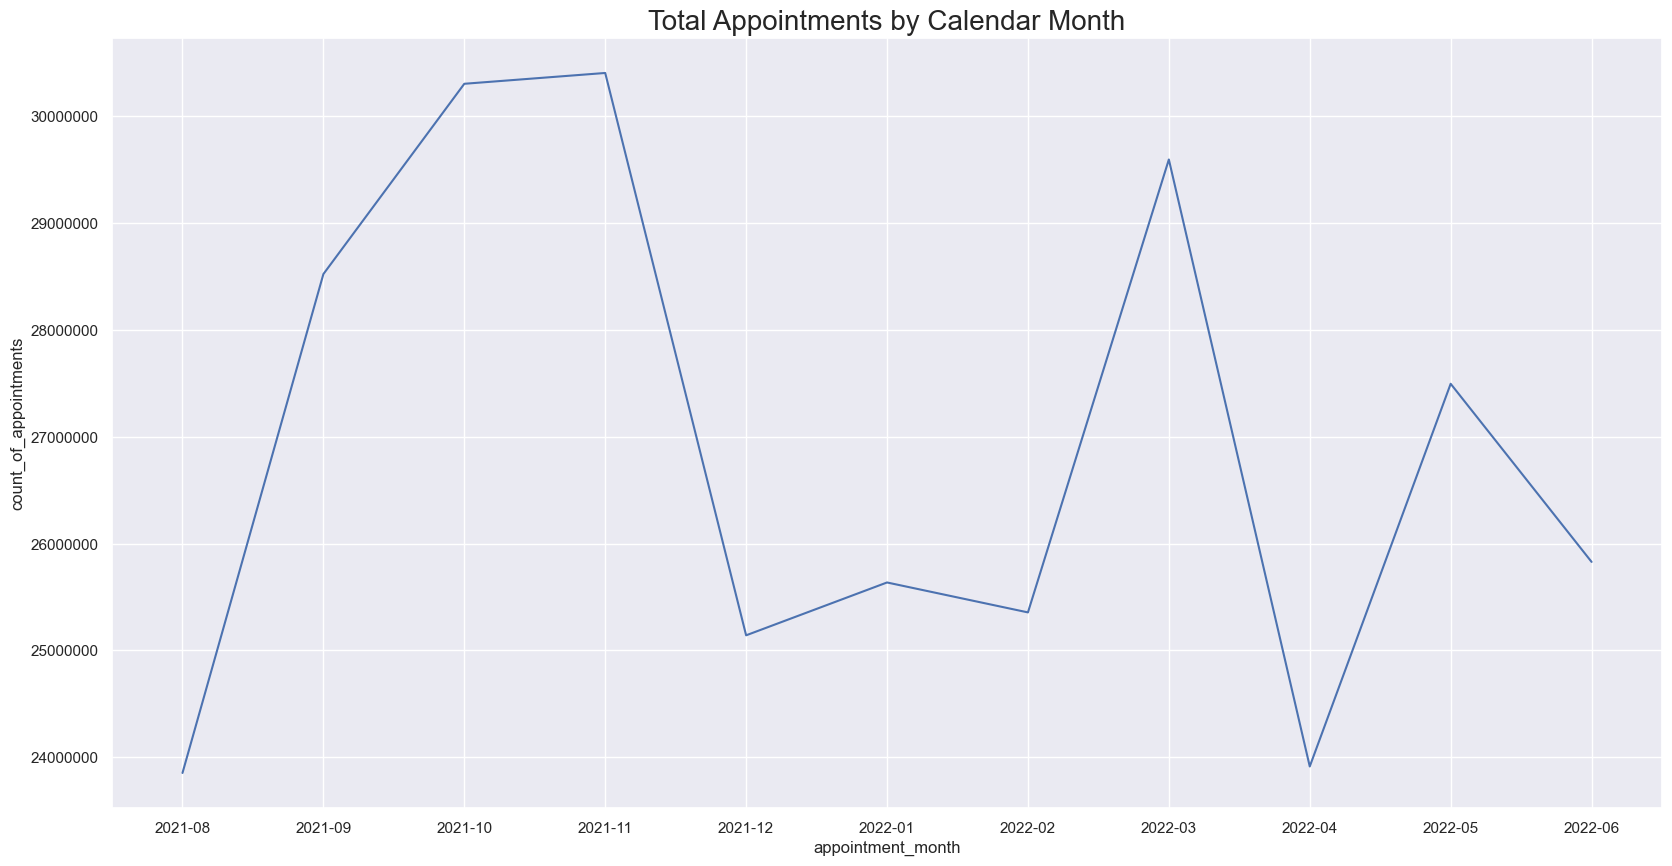

In [89]:
# Create a lineplot
sns.set(rc={'figure.figsize':(20, 10)})
sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_sumbymonth)
plt.title('Total Appointments by Calendar Month',fontsize= 20)
plt.ticklabel_format(style='plain', axis='y')


**All by date:**

In [85]:
nc_sumbydate

appointment_date  count_of_appointments
0         2021-08-01                   5627
1         2021-08-02                1222768
2         2021-08-03                1169920
3         2021-08-04                1093532
4         2021-08-05                1074043
..               ...                    ...
329       2022-06-26                   6574
330       2022-06-27                1410883
331       2022-06-28                1335598
332       2022-06-29                1237258
333       2022-06-30                1226746

[334 rows x 2 columns]

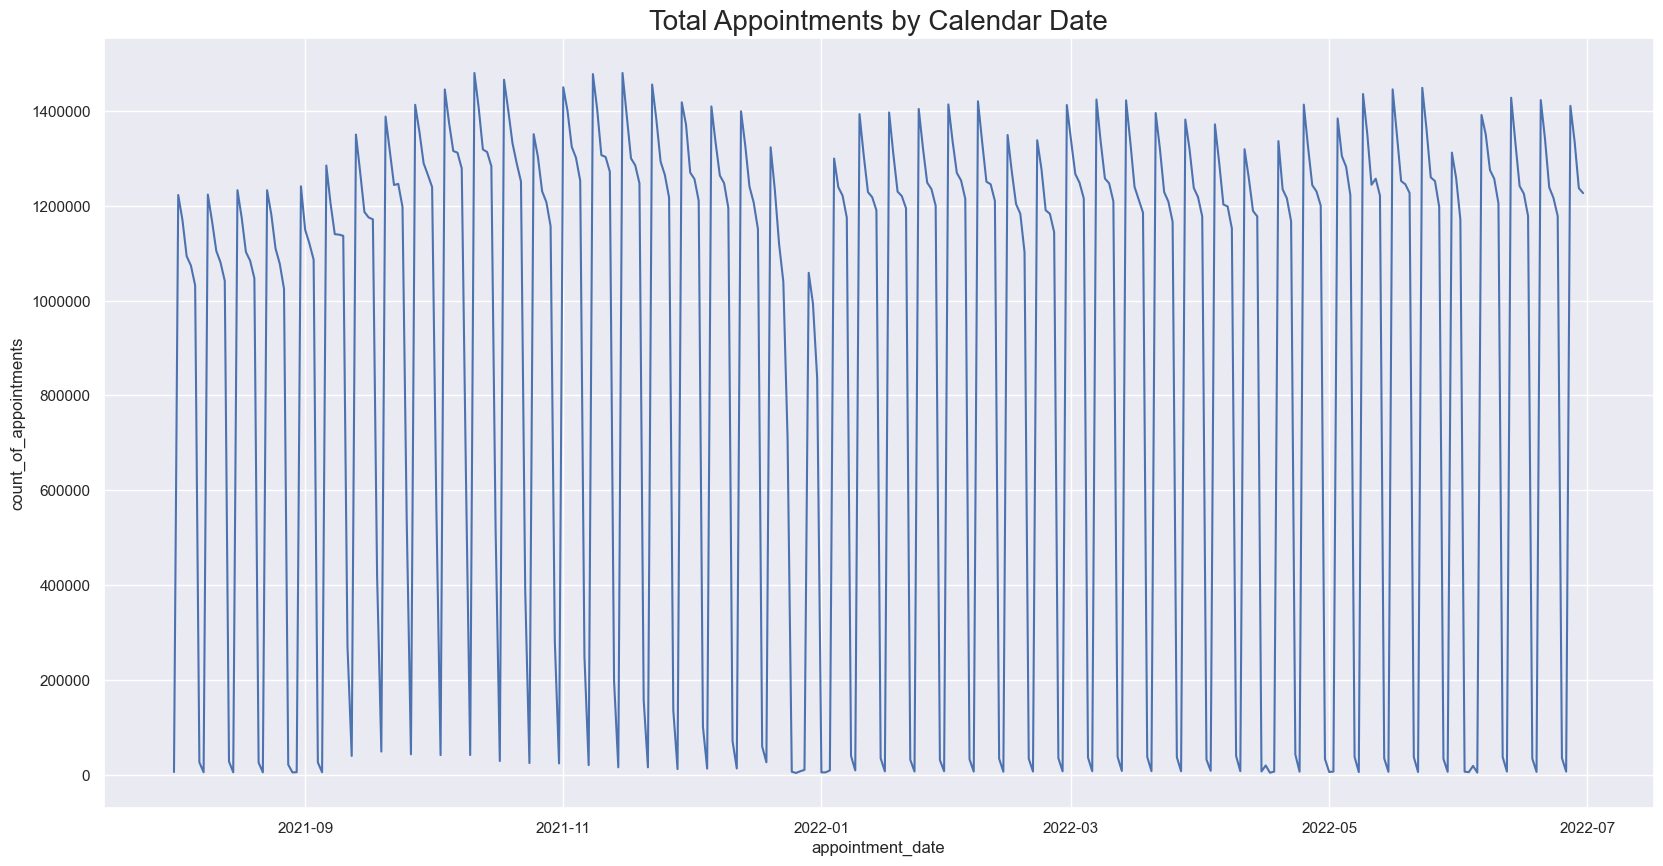

In [87]:
# Create a lineplot
sns.set(rc={'figure.figsize':(20, 10)})
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_sumbydate)
plt.title('Total Appointments by Calendar Date',fontsize= 20)
plt.ticklabel_format(style='plain', axis='y')


**Service settings:**

In [91]:
# Plot the appointments over the available date range, and review the service settings for months. (nc)
# Regroup data to form a separate DataFrame
nc_ss = nc.groupby(['service_setting', 'appointment_month'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ss


service_setting appointment_month  count_of_appointments
0   Extended Access Provision           2021-08                 160927
1   Extended Access Provision           2021-09                 187906
2   Extended Access Provision           2021-10                 209539
3   Extended Access Provision           2021-11                 207577
4   Extended Access Provision           2021-12                 173504
5   Extended Access Provision           2022-01                 186375
6   Extended Access Provision           2022-02                 196627
7   Extended Access Provision           2022-03                 231905
8   Extended Access Provision           2022-04                 192284
9   Extended Access Provision           2022-05                 220511
10  Extended Access Provision           2022-06                 209652
11           General Practice           2021-08               21575852
12           General Practice           2021-09               25940821
13           General Practice           2021-10               27606171
14           General Practice           2021-11               27767889
15           General Practice           2021-12               23008818
16           General Practice           2022-01               23583053
17           General Practice           2022-02               23305934
18           General Practice           2022-03               27187368
19           General Practice           2022-04               21916791
20           General Practice           2022-05               25238620
21           General Practice           2022-06               23680374
22                      Other           2021-08                 449101
23                      Other           2021-09                 527174
24                      Other           2021-10                 556487
25                      Other           2021-11                 558784
26                      Other           2021-12                 464718
27                      Other           2022-01                 457440
28                      Other           2022-02                 456153
29                      Other           2022-03                 530677
30                      Other           2022-04                 437402
31                      Other           2022-05                 503327
32                      Other           2022-06                 478813
33       Primary Care Network           2021-08                 432448
34       Primary Care Network           2021-09                 530485
35       Primary Care Network           2021-10                 564981
36       Primary Care Network           2021-11                 614324
37       Primary Care Network           2021-12                 539479
38       Primary Care Network           2022-01                 569044
39       Primary Care Network           2022-02                 585300
40       Primary Care Network           2022-03                 702176
41       Primary Care Network           2022-04                 606270
42       Primary Care Network           2022-05                 712280
43       Primary Care Network           2022-06                 700599
44                   Unmapped           2021-08                1233843
45                   Unmapped           2021-09                1336115
46                   Unmapped           2021-10                1366656
47                   Unmapped           2021-11                1256496
48                   Unmapped           2021-12                 954257
49                   Unmapped           2022-01                 839562
50                   Unmapped           2022-02                 811246
51                   Unmapped           2022-03                 942912
52                   Unmapped           2022-04                 760313
53                   Unmapped           2022-05                 820770
54                   Unmapped           2022-06                 758640

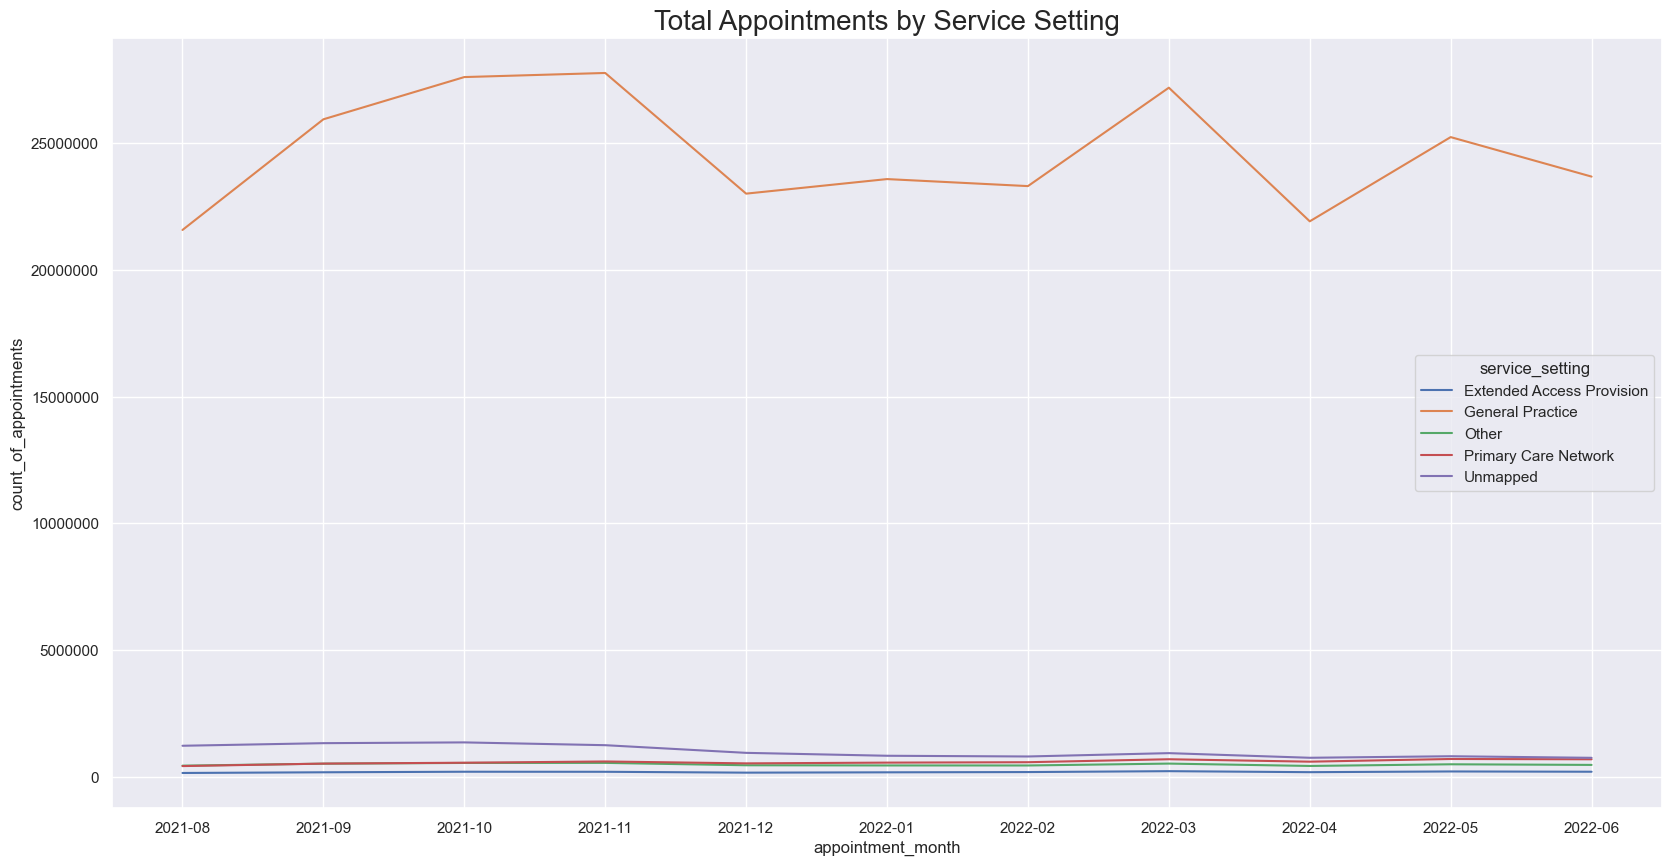

In [95]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.set(rc={'figure.figsize':(20, 10)})
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss)
plt.title('Total Appointments by Service Setting',fontsize= 20)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='best') 
plt.legend(title='Service Settings')


**National categories:**

In [97]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc.groupby(['national_category', 'appointment_month'])['count_of_appointments'].sum().reset_index()

# View output.
nc_nc


national_category appointment_month  \
0    Care Home Needs Assessment & Personalised Care...           2021-08   
1    Care Home Needs Assessment & Personalised Care...           2021-09   
2    Care Home Needs Assessment & Personalised Care...           2021-10   
3    Care Home Needs Assessment & Personalised Care...           2021-11   
4    Care Home Needs Assessment & Personalised Care...           2021-12   
..                                                 ...               ...   
193                                            Walk-in           2022-02   
194                                            Walk-in           2022-03   
195                                            Walk-in           2022-04   
196                                            Walk-in           2022-05   
197                                            Walk-in           2022-06   

     count_of_appointments  
0                    29676  
1                    33503  
2                    32441  
3                    38827  
4                    34653  
..                     ...  
193                  31665  
194                  38070  
195                  32346  
196                  37687  
197                  35935  

[198 rows x 3 columns]

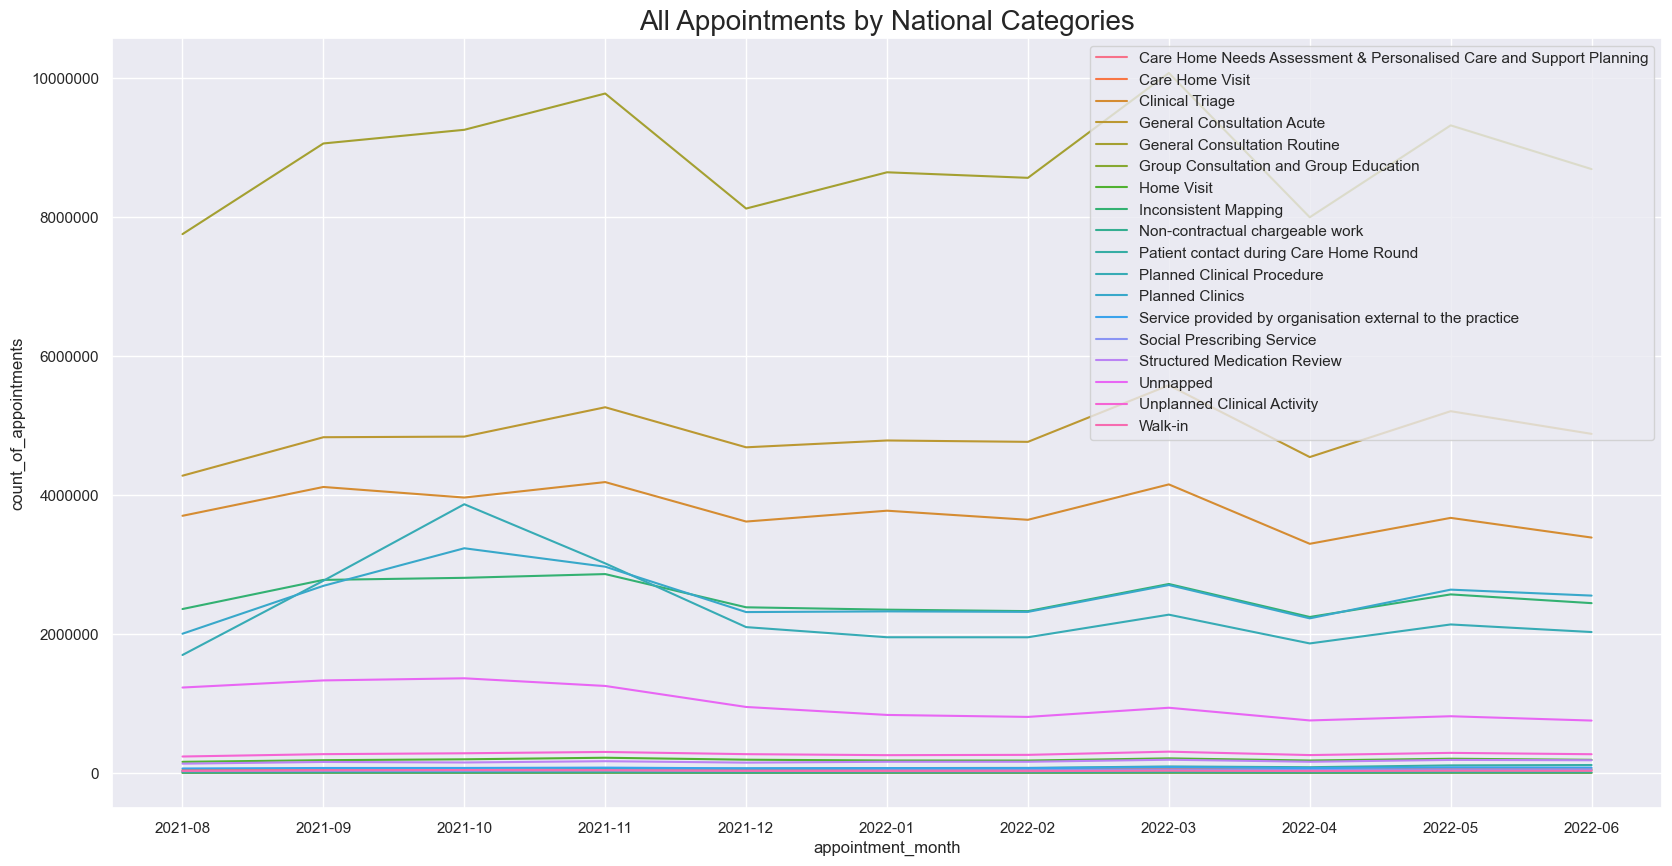

<Figure size 2000x1000 with 0 Axes>

In [99]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
sns.set(rc={'figure.figsize':(20, 10)})
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', data=nc_nc, errorbar=None)
plt.title('All Appointments by National Categories',fontsize= 20)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='best') 
plt.legend(title='National Categories')

# Show the plot
plt.show() 


### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

**Summer (June to August 2021):**

In [103]:
# Create a separate data set (summer 2021)
nc_summer = nc[(nc['appointment_date'] >= '2021-06-01') & (nc['appointment_date'] <= '2021-08-31')]
nc_summer = nc_summer.groupby(['service_setting','appointment_date'])['count_of_appointments'].sum().reset_index()

# View output.
nc_summer

# There is only 1 month's data, display by date.


service_setting appointment_date  count_of_appointments
0    Extended Access Provision       2021-08-01                    438
1    Extended Access Provision       2021-08-02                   7705
2    Extended Access Provision       2021-08-03                   7820
3    Extended Access Provision       2021-08-04                   6917
4    Extended Access Provision       2021-08-05                   6841
..                         ...              ...                    ...
150                   Unmapped       2021-08-27                  51444
151                   Unmapped       2021-08-28                   2015
152                   Unmapped       2021-08-29                    869
153                   Unmapped       2021-08-30                   1537
154                   Unmapped       2021-08-31                  62380

[155 rows x 3 columns]

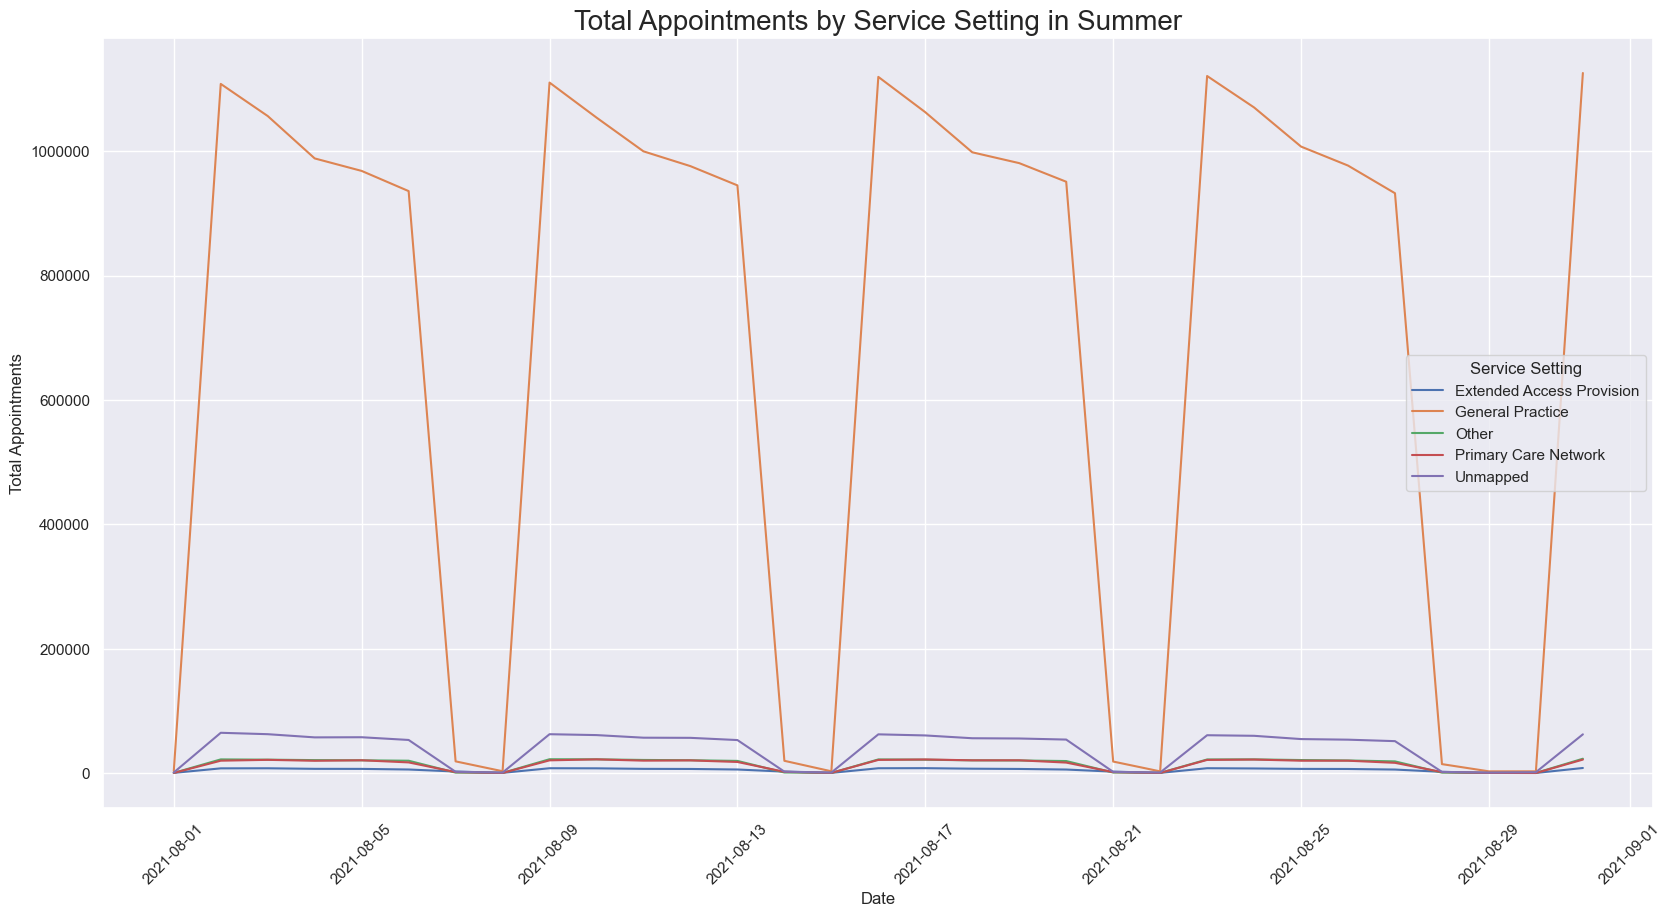

In [107]:
# Look at June to August 2021 in more detail to allow a closer look. (by date)

# Set figure size.
sns.set(rc={'figure.figsize':(20, 10)})

# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_summer, errorbar=None)
plt.title('Total Appointments by Service Setting in Summer', fontsize= 20)
plt.xlabel('Date')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='best') 
plt.legend(title='Service Settings')


**Autumn (September to November 2021):**

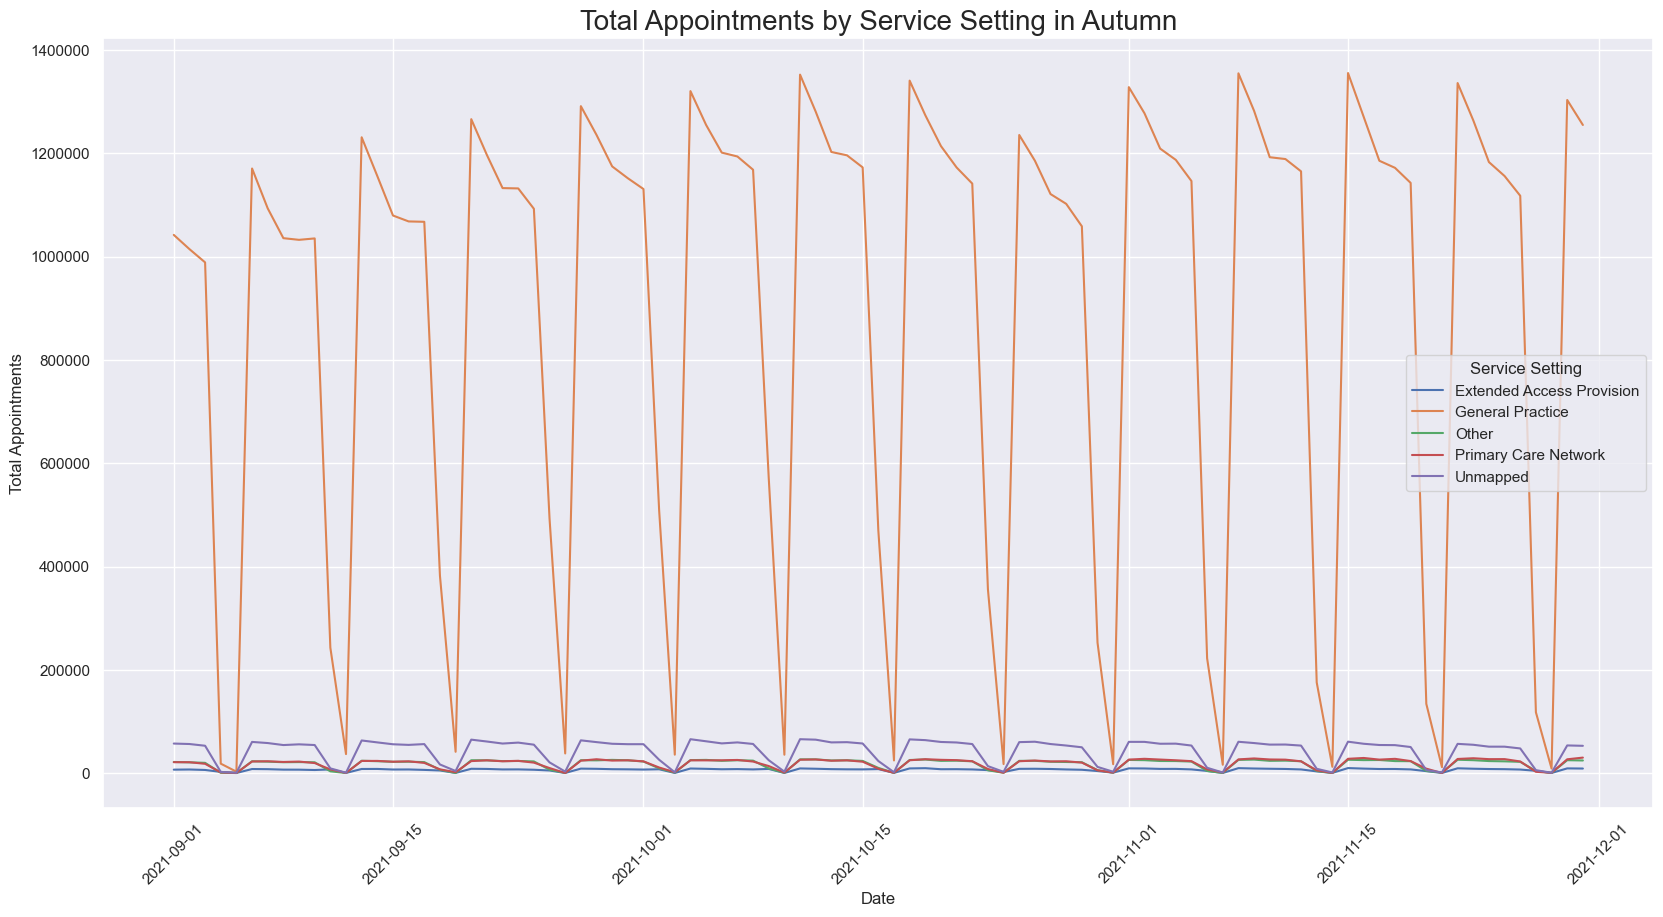

In [109]:
# Look at September to November 2021 in more detail to allow a closer look.
nc_autumn = nc[(nc['appointment_date'] >= '2021-09-01') & (nc['appointment_date'] <= '2021-11-30')]
nc_autumn = nc_autumn.groupby(['service_setting','appointment_month','appointment_date'])['count_of_appointments'].sum().reset_index()

# Set figure size.
sns.set(rc={'figure.figsize':(20, 10)})

# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_autumn, errorbar=None)
plt.title('Total Appointments by Service Setting in Autumn', fontsize= 20)
plt.xlabel('Date')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.legend(title='Service Settings')
plt.ticklabel_format(style='plain', axis='y')


**Winter (December to February 2022):**

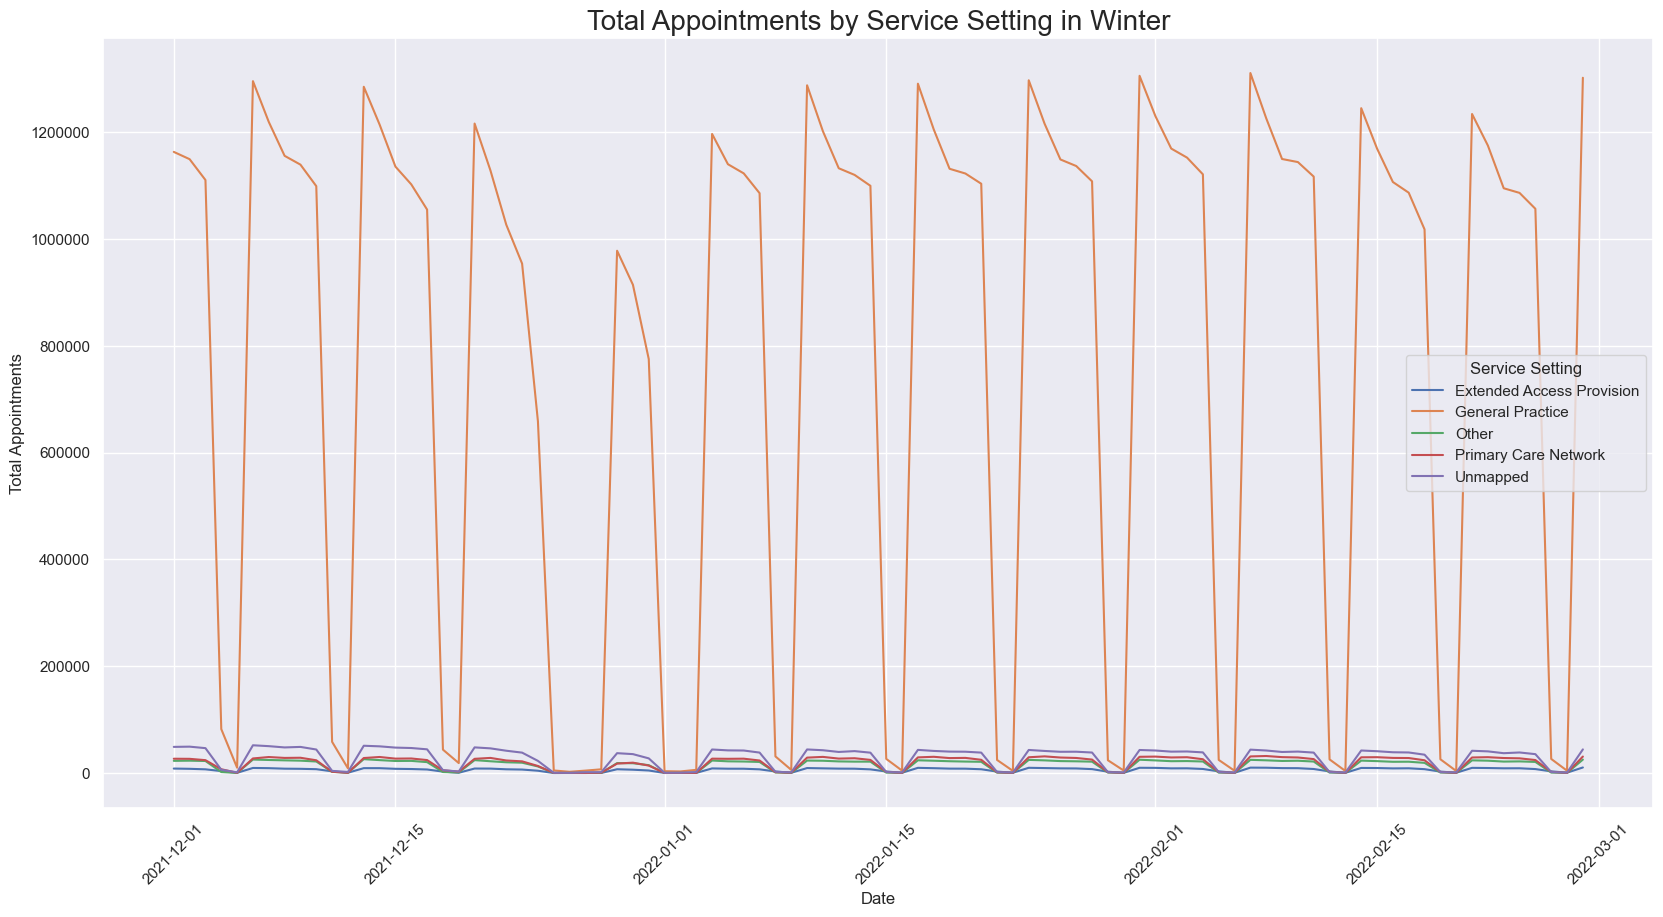

In [111]:
# Look at December to February 2022 in more detail to allow a closer look.
nc_winter = nc[(nc['appointment_date'] >= '2021-12-01') & (nc['appointment_date'] <= '2022-02-28')]
nc_winter = nc_winter.groupby(['service_setting','appointment_month','appointment_date'])['count_of_appointments'].sum().reset_index()

# Set figure size.
sns.set(rc={'figure.figsize':(20, 10)})

# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_winter, errorbar=None)
plt.title('Total Appointments by Service Setting in Winter', fontsize= 20)
plt.xlabel('Date')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.legend(title='Service Settings')
plt.ticklabel_format(style='plain', axis='y')


**Spring (March to May 2022):**

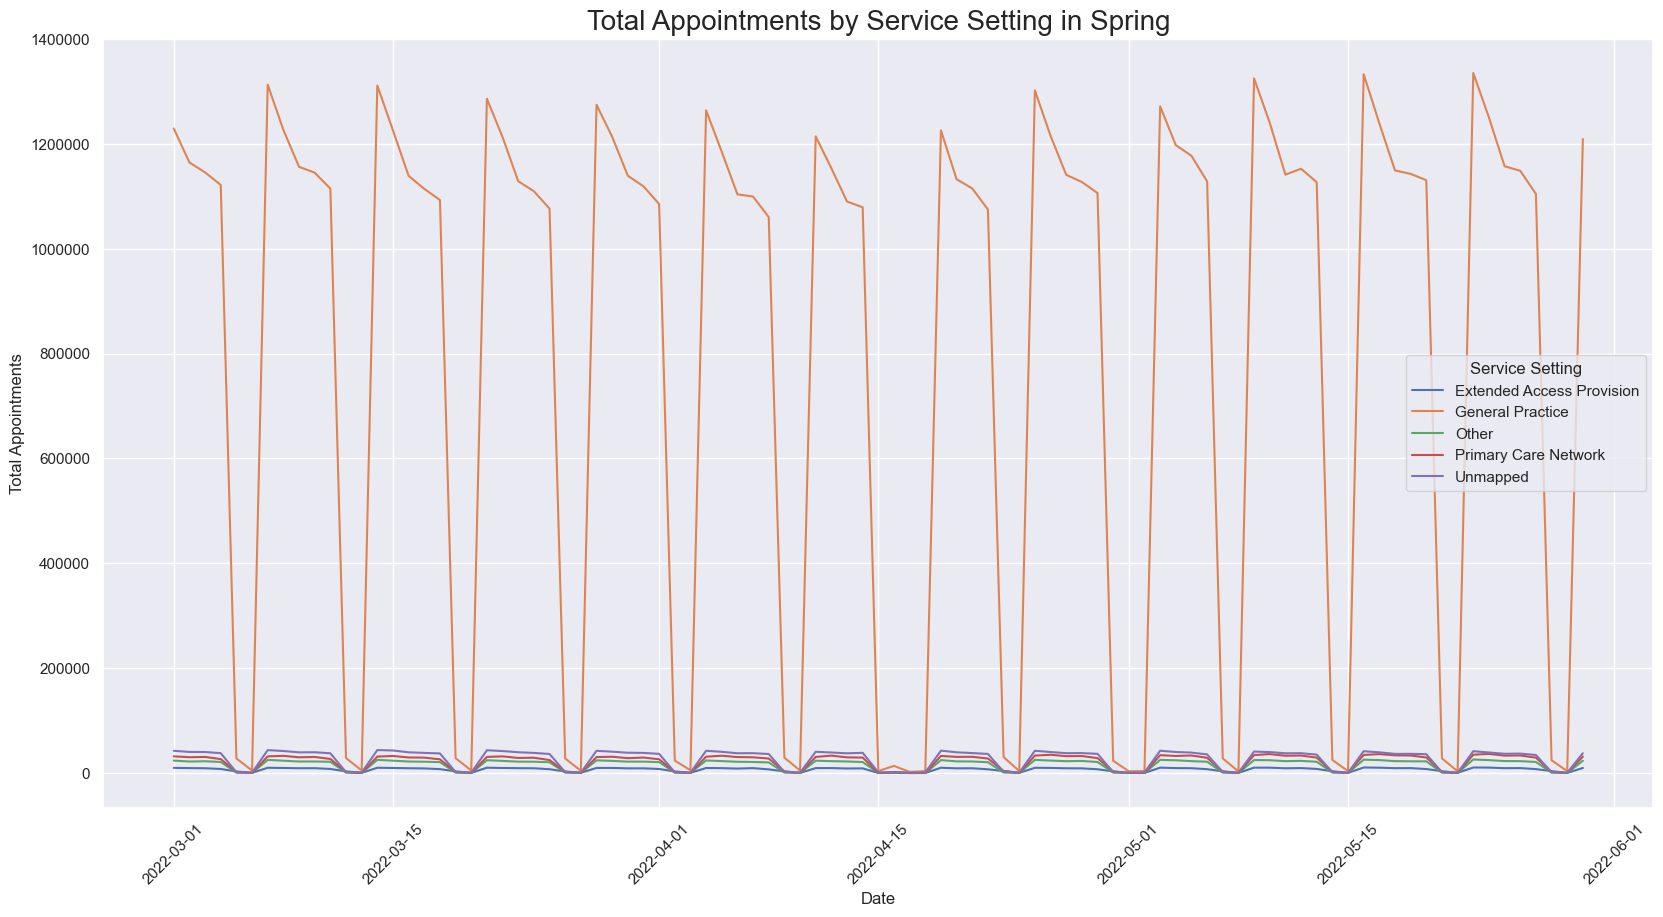

In [113]:
# Look at March to May 2022 in more detail to allow a closer look.

nc_spring = nc[(nc['appointment_date'] >= '2022-03-01') & (nc['appointment_date'] <= '2022-05-30')]
nc_spring = nc_spring.groupby(['service_setting','appointment_month','appointment_date'])['count_of_appointments'].sum().reset_index()

# Set figure size.
sns.set(rc={'figure.figsize':(20, 10)})

# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_spring, errorbar=None)
plt.title('Total Appointments by Service Setting in Spring', fontsize= 20)
plt.xlabel('Date')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.legend(title='Service Settings')
plt.ticklabel_format(style='plain', axis='y')



**All (June 2021 to May 2022):**

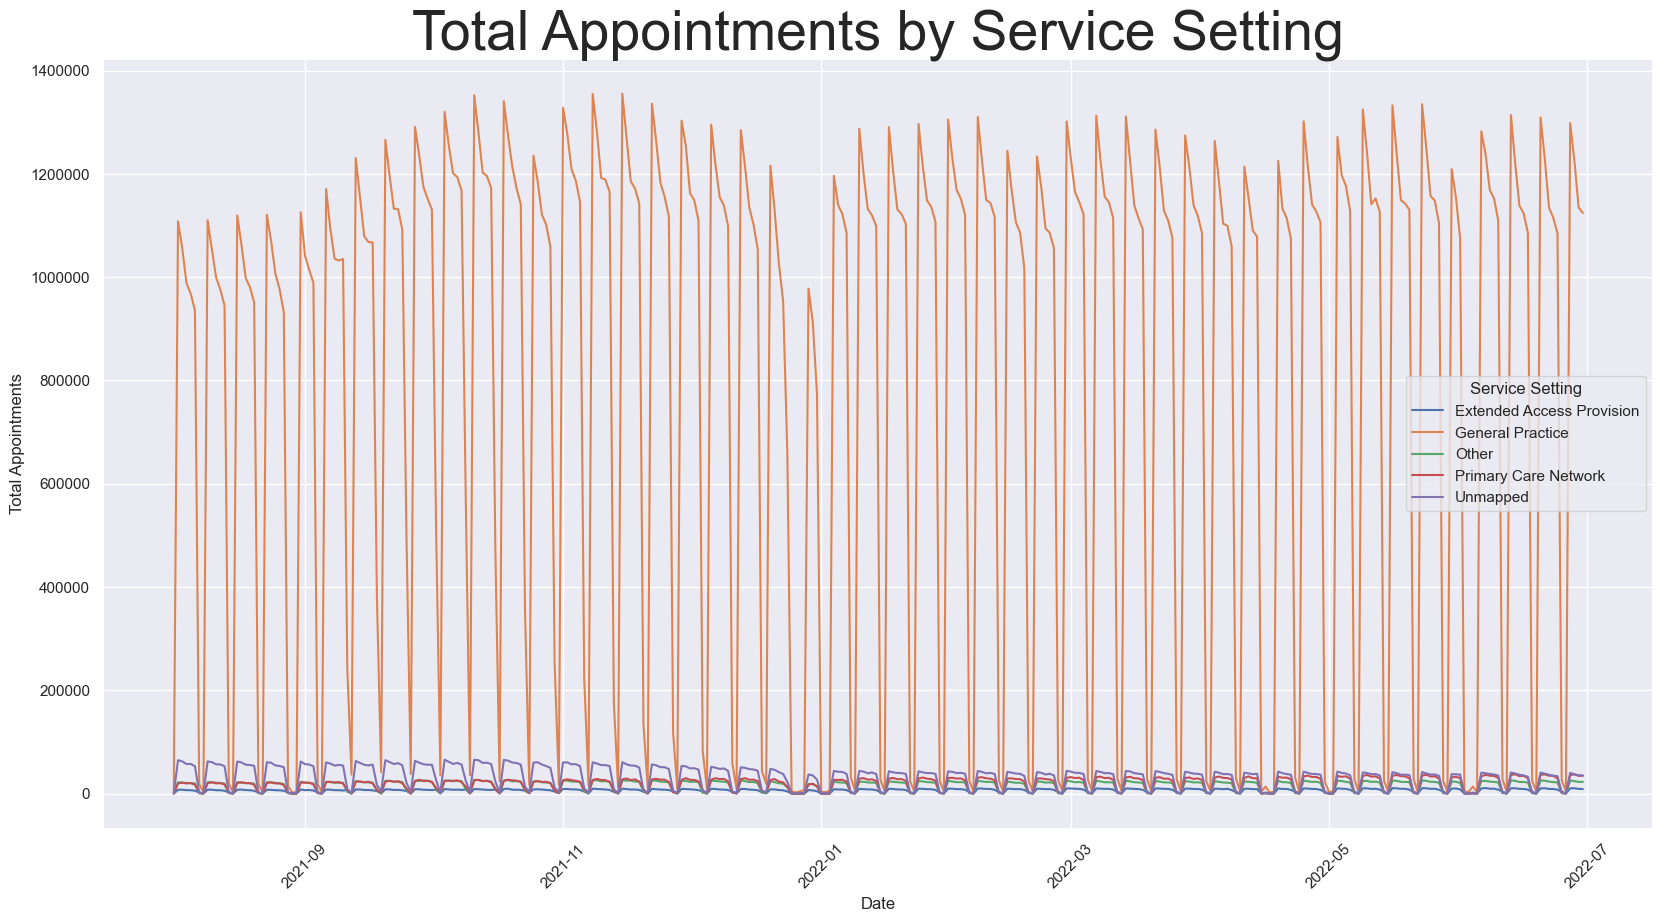

In [121]:
# nc_service setting by date lineplot
nc_ss_all = nc.groupby(['service_setting', 'appointment_month','appointment_date'])['count_of_appointments'].sum().reset_index()

# Set figure size.
sns.set(rc={'figure.figsize':(20, 10)})

# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_all)
plt.title('Total Appointments by Service Setting',fontsize= 40)
plt.xlabel('Date')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='best') 
plt.legend(title='Service Settings')


**All (ex. GP, June 2021 to May 2022):**

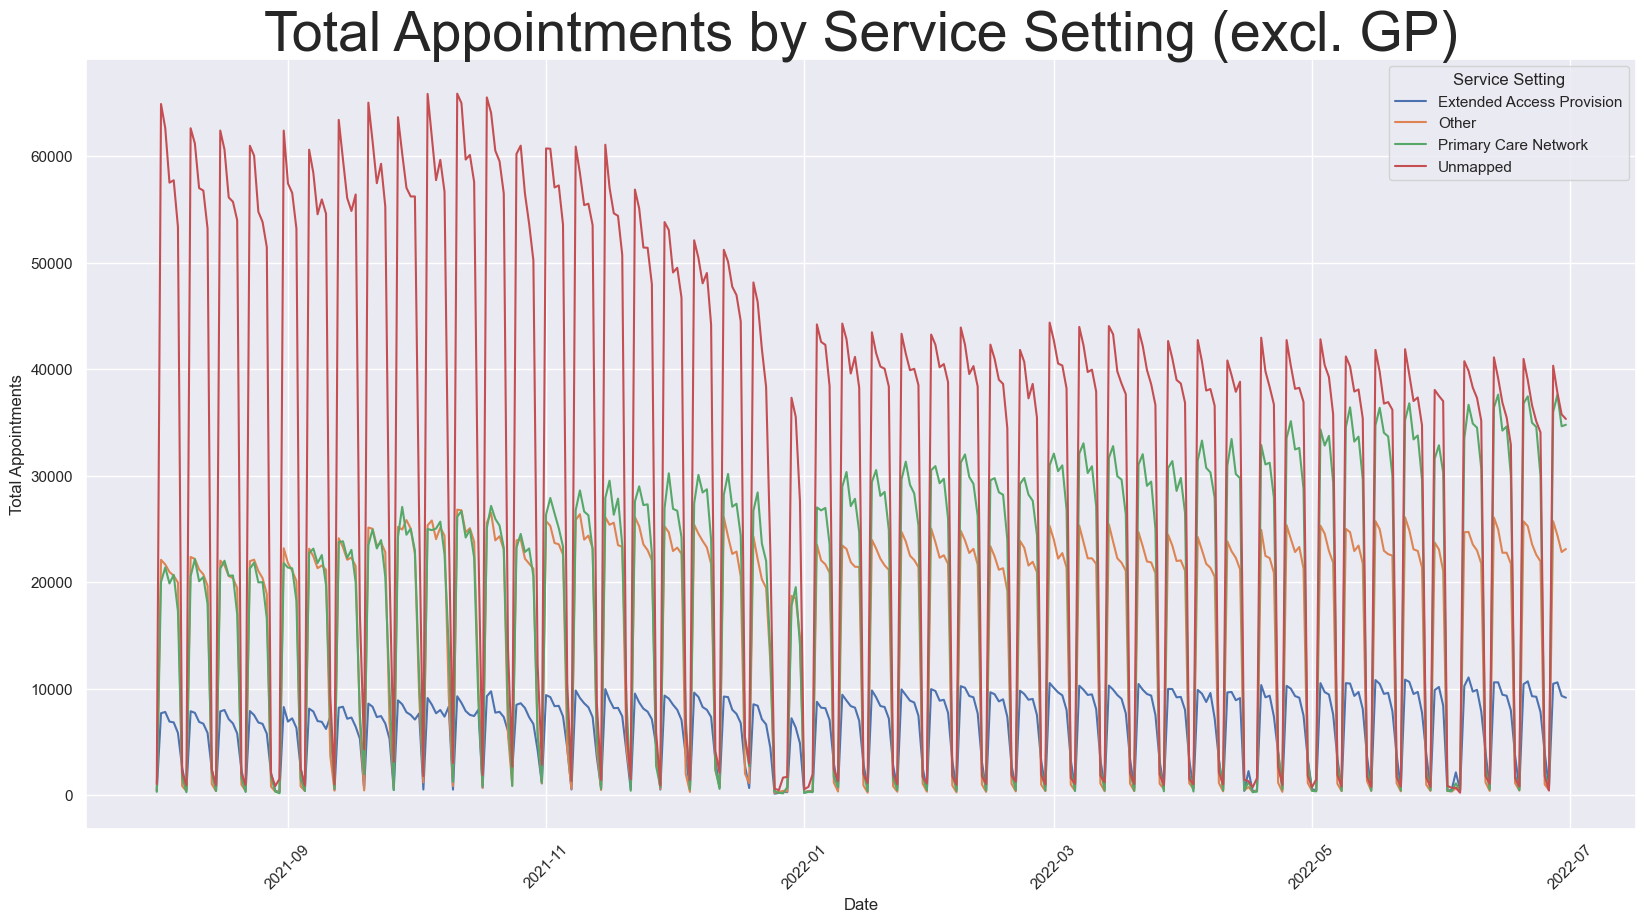

In [123]:
# nc_service setting (ex GP) by date lineplot
nc_ss_exGP = nc_ss_all[nc_ss_all['service_setting'] !="General Practice"]

# Set figure size.
sns.set(rc={'figure.figsize':(20, 10)})

# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_exGP)
plt.title('Total Appointments by Service Setting (excl. GP)',fontsize= 40)
plt.xlabel('Date')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='best') 
plt.legend(title='Service Settings')


# 

## **Analysis on tweets.csv document**

Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [125]:
# Ensure the necessary libraries are imported
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(10, 20)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200


In [127]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
print(tweets.shape)
print(tweets.dtypes)
print(tweets.columns)
print(tweets.head)


(1174, 10)
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object
Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')
<bound method NDFrame.head of                  tweet_id  \
0     1567629223795527681   
1     1567582846612553728   
2     1567582787070304256   
3     1567582767625428992   
4     1567582720460570625   
...                   ...   
1169  1567583004209332227   
1170  1567582945342267393   
1171  1567582936014241792   
1172  1567582892892782592   
1173  1567582846847533058   

            

In [129]:
# Explore the metadata.
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [131]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.

tweets_fav = tweets["tweet_retweet_count"].value_counts()
tweets_re = tweets["tweet_favorite_count"].value_counts()
	
print(tweets_fav)
print(tweets_re)

# No. Most messages are not fav or retweeted.


tweet_retweet_count
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: count, dtype: int64
tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: count, dtype: int64


In [133]:
# Create a new DataFrame containing only the text.
tweets_text = tweets["tweet_full_text"]

# View the DataFrame.
tweets_text.head()


0    As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...
1                                                                RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…
2                                                             RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3                                                               RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4    ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take 

In [135]:
# Loop through the messages, and create a list of values containing the # symbol.

# Initialize the variable 'tags' as an empty list
tags = []

# Loop through each tweet and each word within the tweet
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase and append to tags
            tags.append(z.lower())

# Create a Pandas Series to count the values in the list
tags_series = pd.Series(tags).value_counts()


In [137]:
# Display the first 30 records.
tags_series.head(30)


#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [139]:
# Convert the series to a DataFrame in preparation for visualisation.
tag = pd.DataFrame(tags_series)

# Display the first few rows
tag.head()


count
#healthcare    716
#health         80
#medicine       41
#ai             40
#job            38

In [141]:
# Fix the count datatype.
tag["count"] = tag["count"].astype(int)

# View the result.
tag.dtypes


count    int32
dtype: object

In [143]:
# Display records where the count is larger than 15.
poptag = tag[tag["count"] > 15].reset_index()

# View the result
print(poptag)


                       index  count
0                #healthcare    716
1                    #health     80
2                  #medicine     41
3                        #ai     40
4                       #job     38
5                   #medical     35
6                  #strategy     30
7            #pharmaceutical     28
8             #digitalhealth     25
9                    #pharma     25
10                #marketing     25
11               #medtwitter     24
12                  #biotech     24
13  #competitiveintelligence     24
14                    #meded     23
15                  #vaccine     18
16                   #hiring     18
17                     #news     17
18          #machinelearning     17
19               #technology     17
20              #coronavirus     16
21          #womeninmedicine     16
22                    #covid     16
23     #competitivemarketing     16


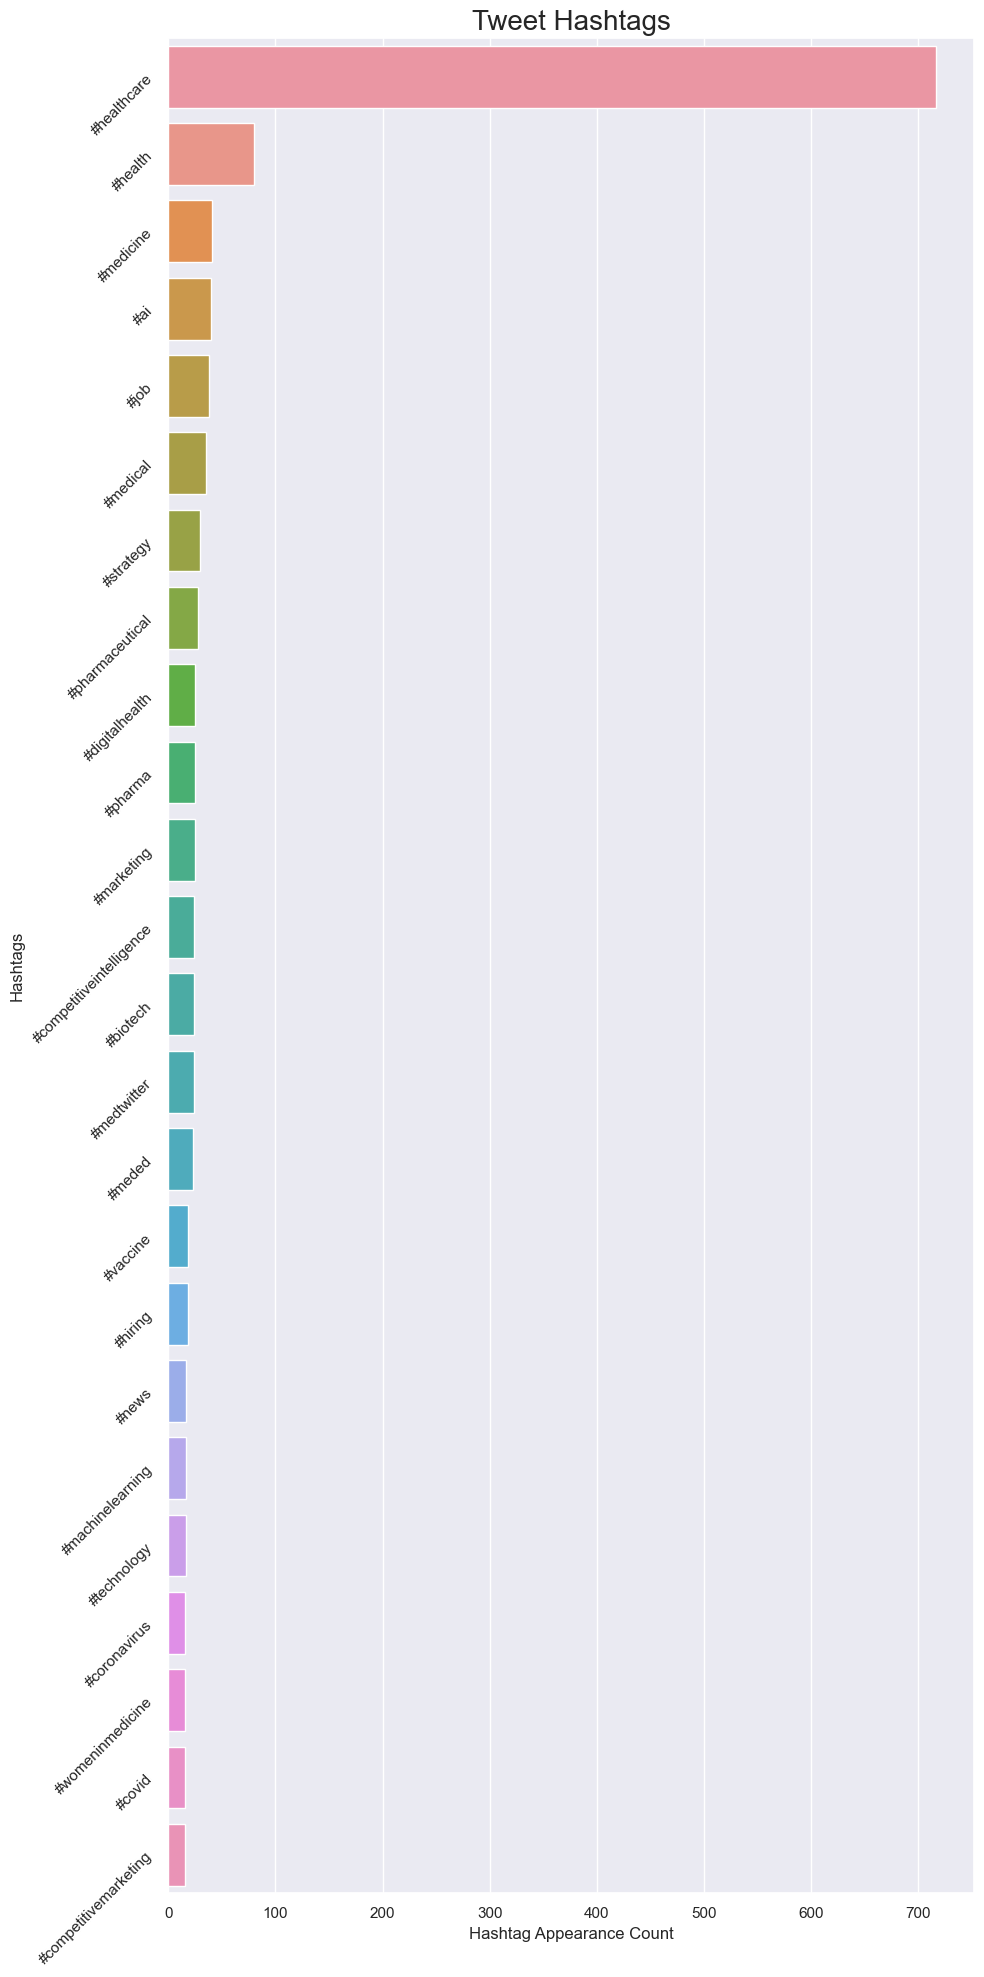

In [145]:
# Set figure size.
sns.set(rc={'figure.figsize':(10,20)})

# Create a Seaborn barplot indicating records with a count >15 records.
sns.barplot(x='count', y='index', data=poptag.sort_values(by='count', ascending=False))
plt.title('Tweet Hashtag Count',fontsize= 40)
plt.title('Tweet Hashtags',fontsize= 20)
plt.xlabel('Hashtag Appearance Count')
plt.ylabel('Hashtags')
plt.yticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


**Note:**
No trends were found in the Tweets & Hashtag analysis.

# 

## **Exploring insights & trends**

### Review the ar dataset

In [147]:
# View the ar DataFrame again.

print(ar.shape)
print(ar.dtypes)
print(ar.columns)
ar.head()


(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [149]:
# Print the min and max dates (again).
armin = ar["appointment_month"].min()
armax = ar["appointment_month"].max()

# Display min and max dates
print(armin)
print(armax)

# Cross checked with former results.


2020-01
2022-06


**Should the NHS start looking at increasing staff levels?**

In [151]:
# Create an aggregated data set to review the different features.
ar_agg = ar.groupby(["appointment_month", "hcp_type", "appointment_status", \
                        "appointment_mode", "time_between_book_and_appointment"])["count_of_appointments"].sum().reset_index()

# View the DataFrame.
ar_agg.head()


appointment_month hcp_type appointment_status appointment_mode  \
0           2020-01       GP           Attended     Face-to-Face   
1           2020-01       GP           Attended     Face-to-Face   
2           2020-01       GP           Attended     Face-to-Face   
3           2020-01       GP           Attended     Face-to-Face   
4           2020-01       GP           Attended     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                 653846  
1                    15  to 21 Days                 620789  
2                       2 to 7 Days                1723834  
3                    22  to 28 Days                 421189  
4                     8  to 14 Days                1123186

In [153]:
# Determine the total number of appointments per month.
ar_df = ar_agg.groupby(["appointment_month"])["count_of_appointments"].sum().reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 21 to get to a daily value. (There are 21 work days on average in a month.)
ar_df["utilisation"] = ar_df["count_of_appointments"]/21
ar_df["utilisation"] = ar_df["utilisation"].astype(int)

# View the DataFrame.
ar_df


appointment_month  count_of_appointments  utilisation
0            2020-01               27199296      1295204
1            2020-02               24104621      1147839
2            2020-03               24053468      1145403
3            2020-04               16007881       762280
4            2020-05               16417212       781772
5            2020-06               20690805       985276
6            2020-07               22491437      1071020
7            2020-08               20150520       959548
8            2020-09               26714255      1272107
9            2020-10               28301932      1347711
10           2020-11               25061602      1193409
11           2020-12               23535936      1120758
12           2021-01               22492069      1071050
13           2021-02               22399569      1066646
14           2021-03               27225424      1296448
15           2021-04               23879932      1137139
16           2021-05               23508395      1119447
17           2021-06               26784182      1275437
18           2021-07               25739219      1225677
19           2021-08               23852171      1135817
20           2021-09               28522501      1358214
21           2021-10               30303834      1443039
22           2021-11               30405070      1447860
23           2021-12               25140776      1197179
24           2022-01               25635474      1220736
25           2022-02               25355260      1207393
26           2022-03               29595038      1409287
27           2022-04               23913060      1138717
28           2022-05               27495508      1309309
29           2022-06               25828078      1229908

**Tips:** 
NHS: an average of 1,200,000 appointments/ work day being used for planning purposes, which you can use as a guideline for maximum capacity.

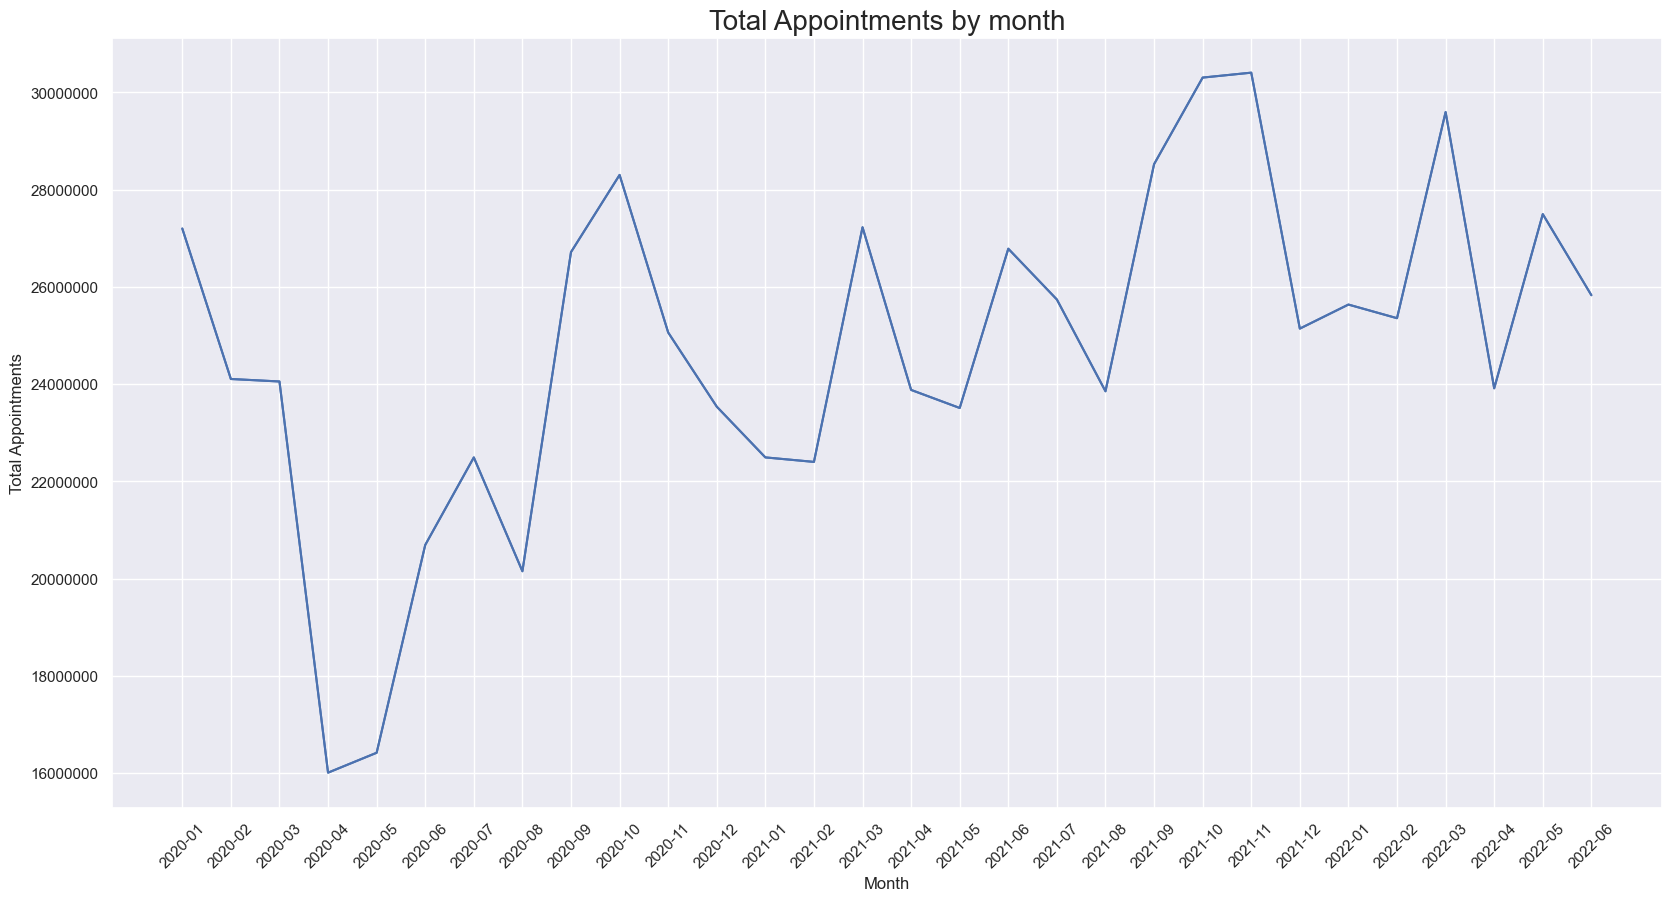

In [159]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_df1 = ar_df
ar_df1["appointment_month"] = ar_df1["appointment_month"].astype(str)

x = ar_df1["appointment_month"]
y = ar_df1["count_of_appointments"]

# Create a plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Create a lineplot with Seaborn.
sns.lineplot(x="appointment_month",y="count_of_appointments",color = 'b',data=ar_df1)
plt.title('Total Appointments by month',fontsize= 20)
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)

# Remove scientific number format on y-axis
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()


**Note:** 
Abnormal data from 2020-01 to 2020-08 due to lockdown and pandemic. 

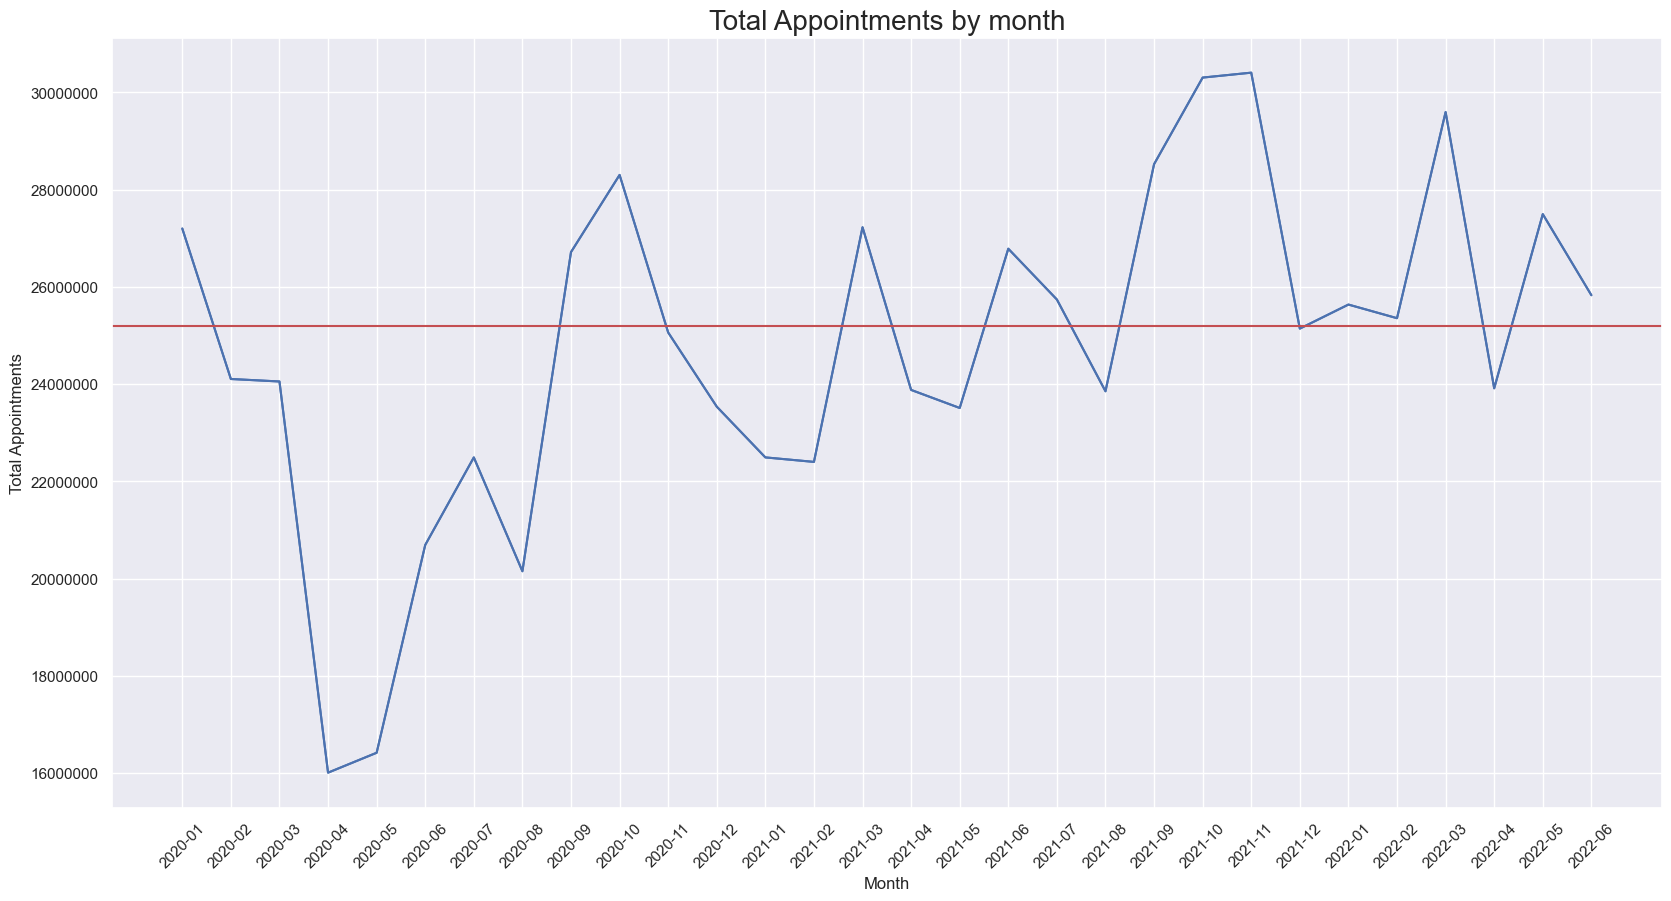

In [157]:
# Create a lineplot indicating the monthly capacity utilisation.
# Create a plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Create a lineplot with Seaborn.
sns.lineplot(x="appointment_month",y="count_of_appointments",color = 'b', data=ar_df1)
plt.title('Total Appointments by month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)

# Remove scientific number format on y-axis
plt.ticklabel_format(style='plain', axis='y')

# Plot monthly capacity utilisation. 21 days * 1200000
plt.axhline(y=21 * 1200000, color='r', linestyle='-')

# Show the plot
plt.show

# Save .png
fig.savefig('all appointments, calendar month and limit.png')


**How do the healthcare professional types differ over time?**

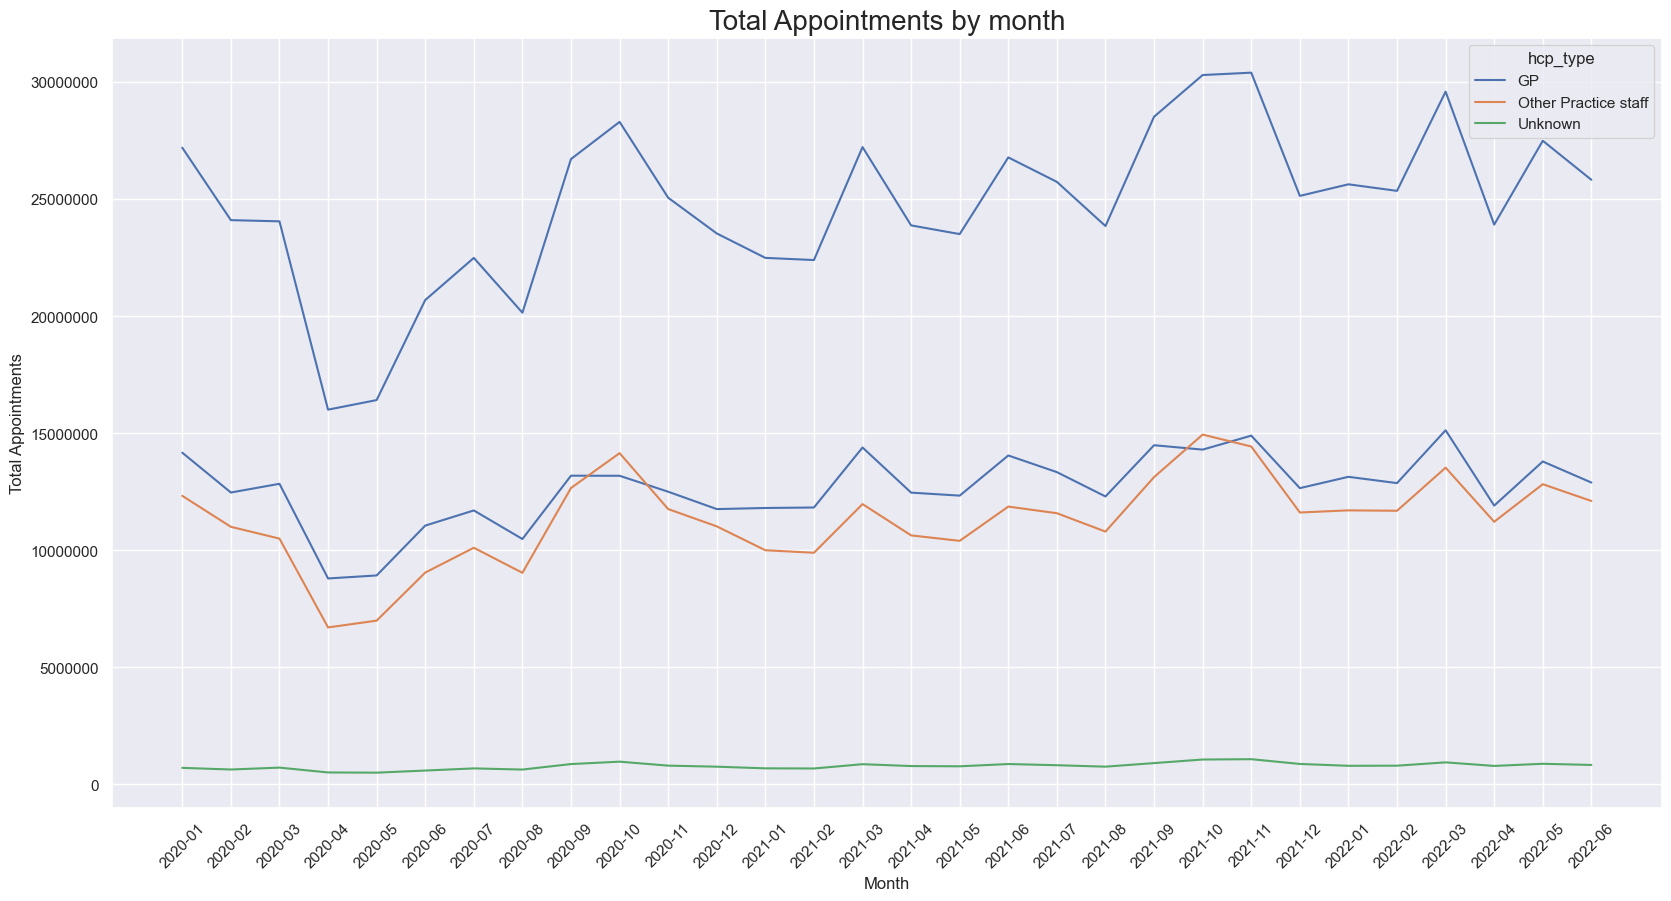

In [223]:
# Regroup data by HCP type
ar_hcp = ar_agg.groupby(["appointment_month","hcp_type"])["count_of_appointments"].sum().reset_index()

# Create a plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Create a line plot to answer the question.
sns.lineplot(x="appointment_month",y="count_of_appointments",hue="hcp_type", data=ar_hcp)
plt.title('Total Appointments by month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.legend(loc='best') 
plt.legend(title='Healthcare professional types')

# Remove scientific number format on y-axis
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()


**Are there significant changes in whether or not visits are attended?**

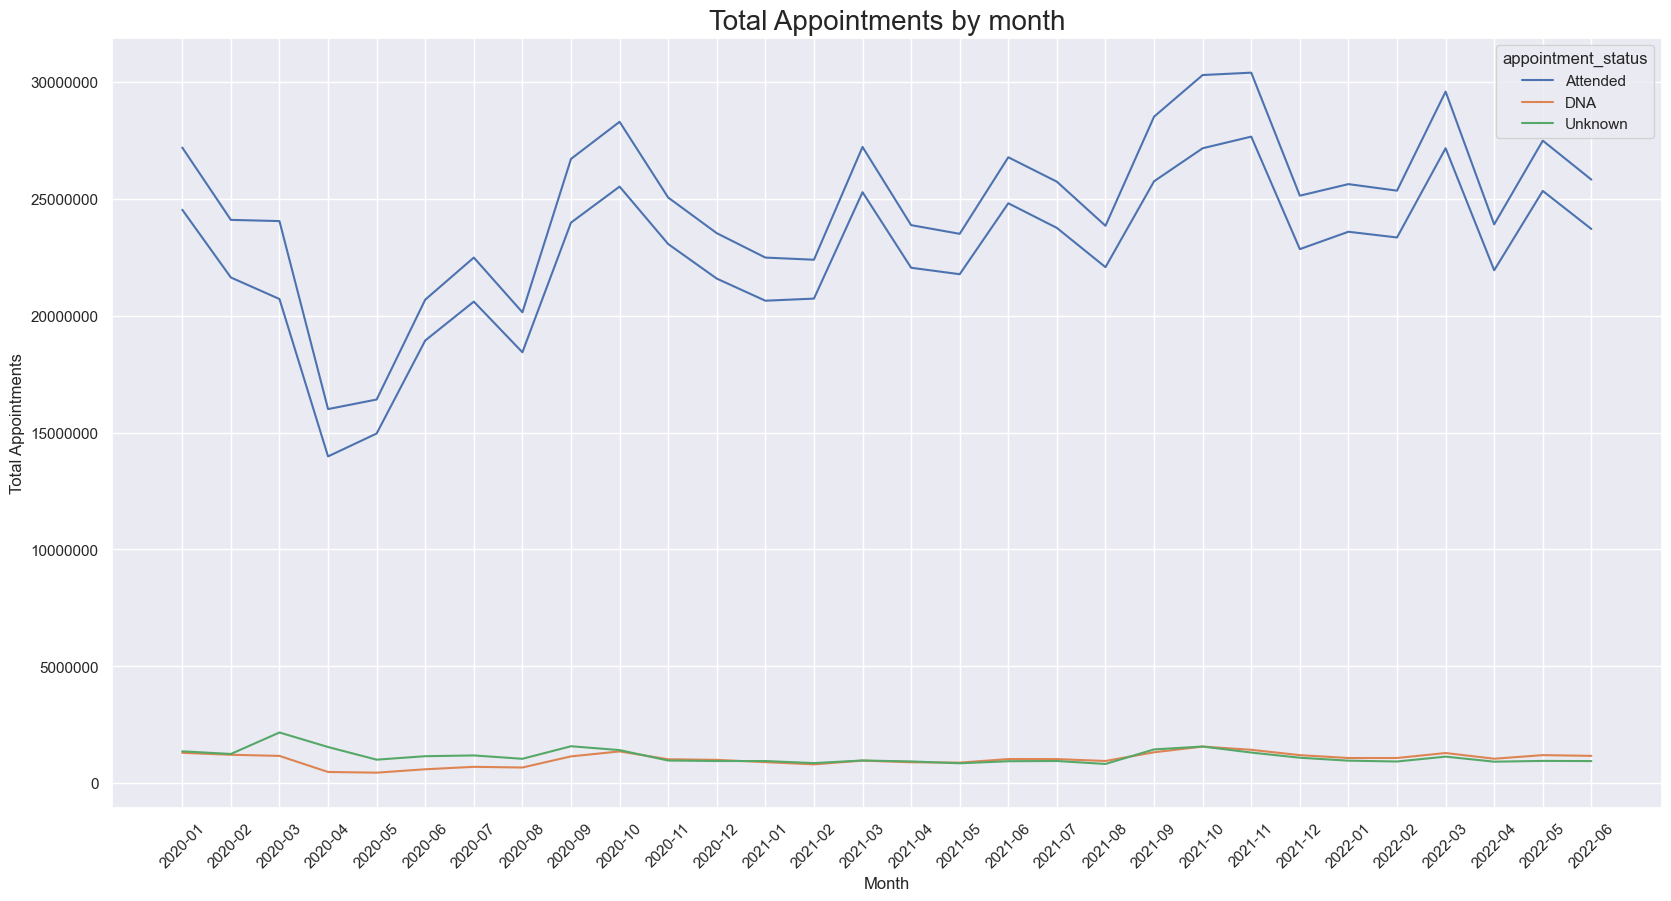

In [231]:
# Regroup data by appointment statuses
ar_attend = ar_agg.groupby(["appointment_month","appointment_status"])["count_of_appointments"].sum().reset_index()

# Create a plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Create a line plot to answer the question.
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x="appointment_month",y="count_of_appointments",hue="appointment_status", data=ar_attend)
plt.title('Total Appointments by month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.legend(loc='best') 
plt.legend(title='Appointment Status')

# Remove scientific number format on y-axis
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()


**Are there changes in terms of appointment type and the busiest months?**

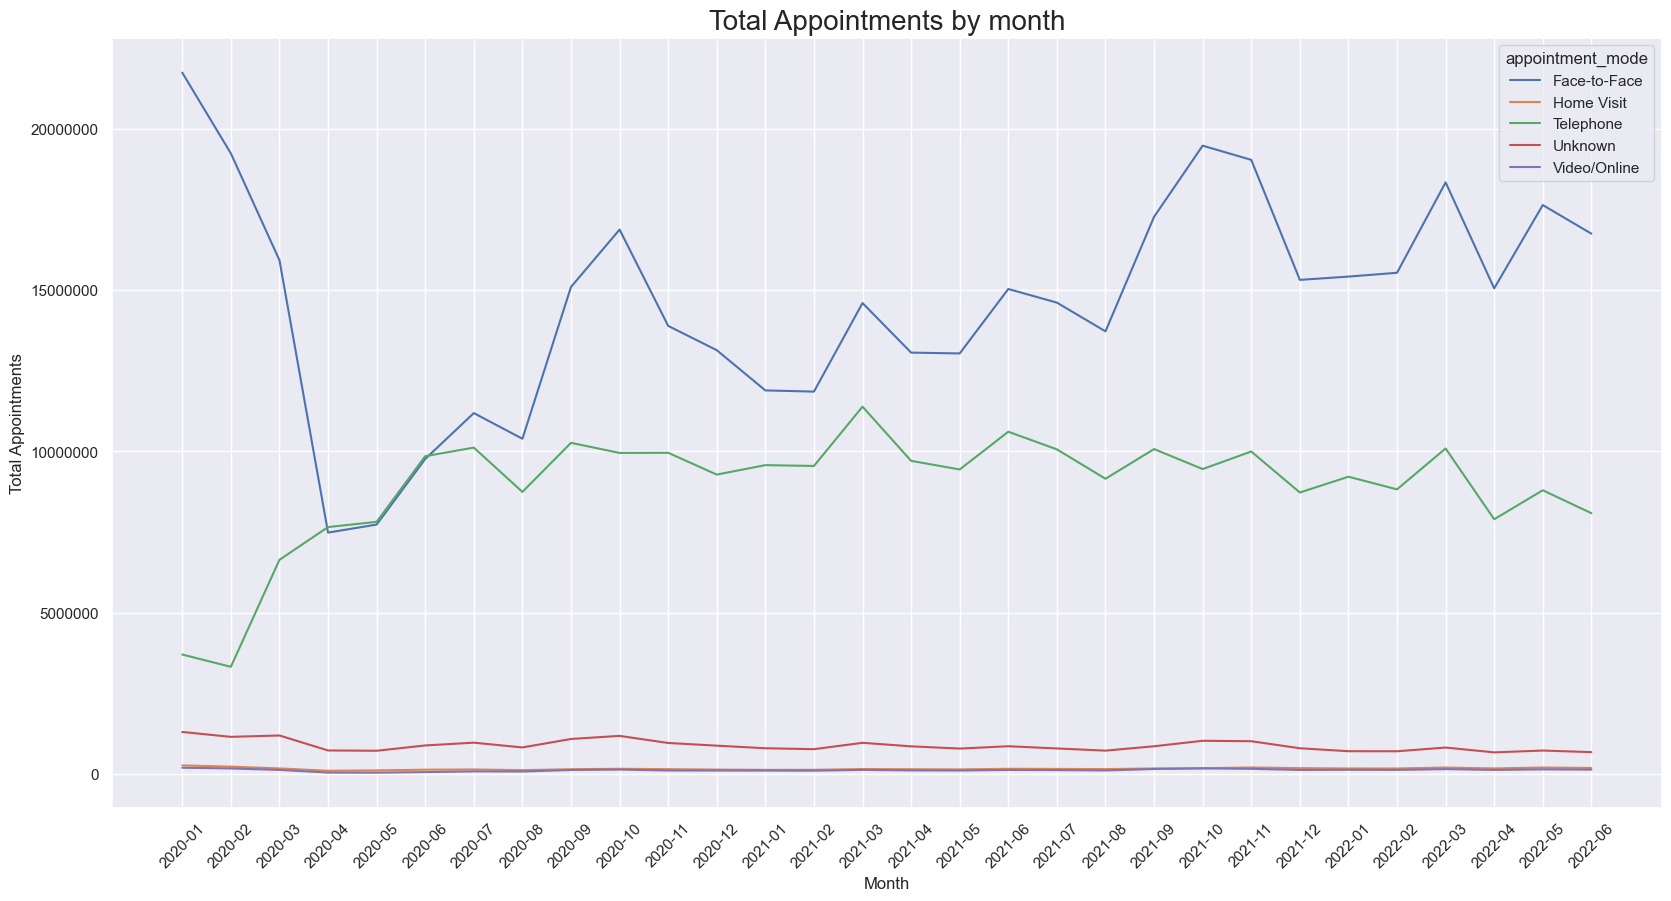

In [165]:
# Regroup data by appointment mode
ar_rdvtype = ar_agg.groupby(["appointment_month","appointment_mode"])["count_of_appointments"].sum().reset_index()

# Create a line plot to answer the question.
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x="appointment_month",y="count_of_appointments",hue="appointment_mode", data=ar_rdvtype)
plt.title('Total Appointments by month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.legend(loc='best') 
plt.legend(title='Appointment Modes')

# Remove scientific number format on y-axis
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()


**Are there any trends in time between booking and appointment?**

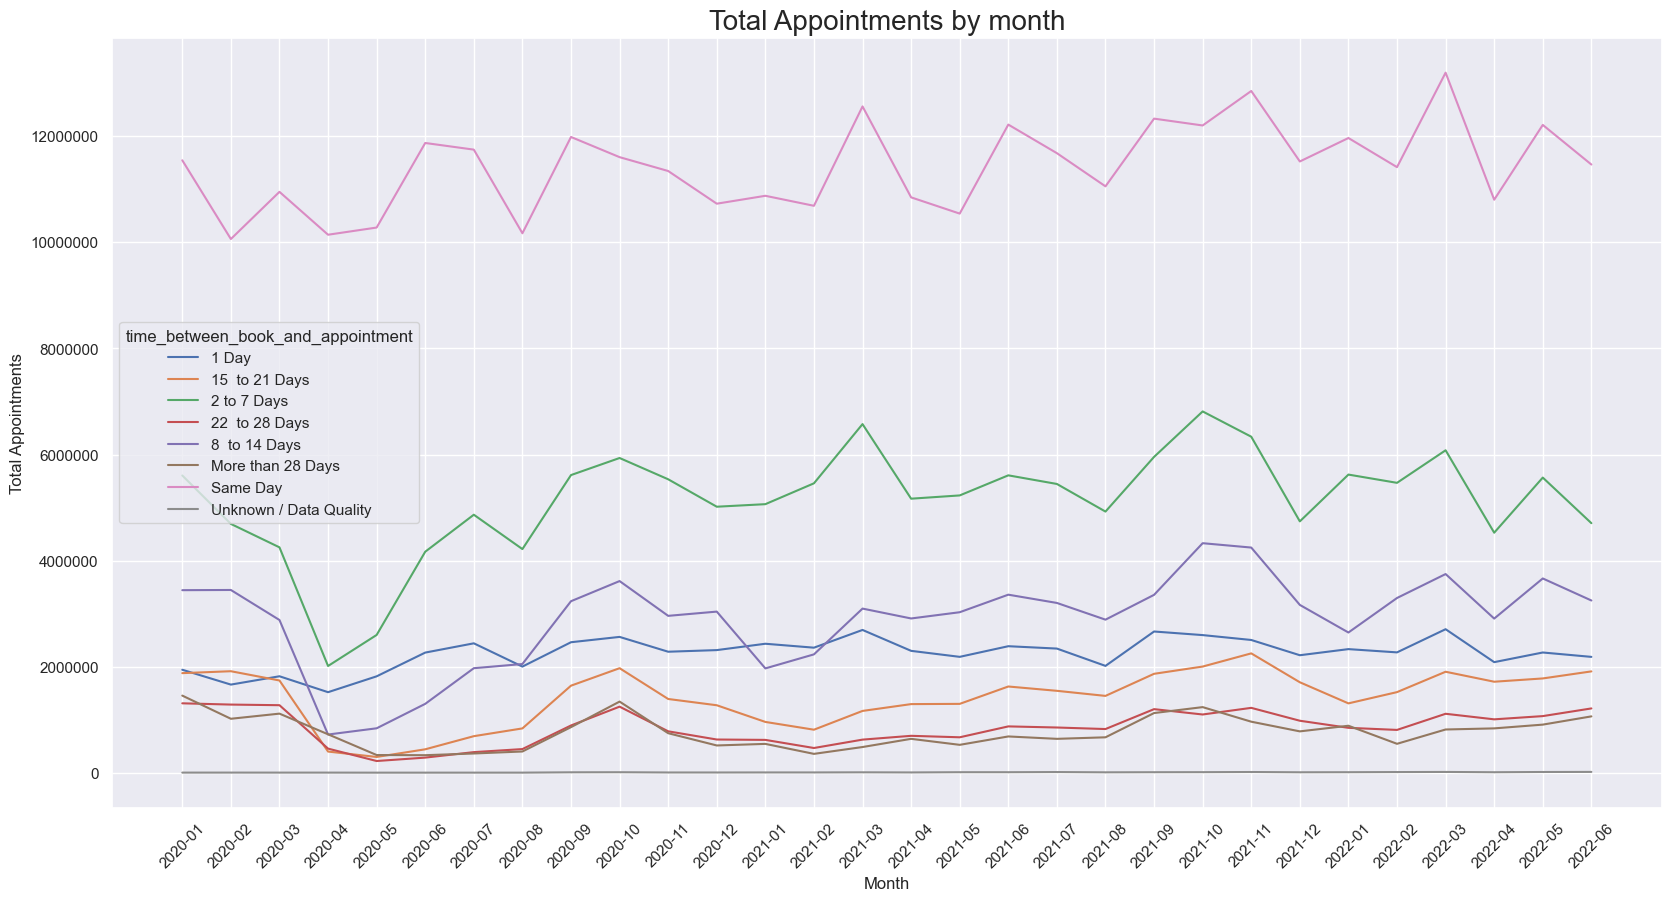

In [167]:
# Regroup data by interval between book and appointment
ar_interval = ar_agg.groupby(["appointment_month","time_between_book_and_appointment"])["count_of_appointments"].sum().reset_index()

# Create a line plot to answer the question.
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x="appointment_month",y="count_of_appointments",hue="time_between_book_and_appointment", data=ar_interval)
plt.title('Total Appointments by month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.legend(loc='best') 
plt.legend(title='Interval between book and appointment')

# Remove scientific number format on y-axis
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()


**How do the various service settings compare?**

In [169]:
# Review nc DataFrame

print(nc.shape)
print(nc.dtypes)
print(nc.columns)
nc.head()


(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [171]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_agg = nc.groupby(["appointment_month", "service_setting"])["count_of_appointments"].sum().reset_index()

# View the DataFrame.
nc_agg.head(30)


appointment_month            service_setting  count_of_appointments
0            2021-08  Extended Access Provision                 160927
1            2021-08           General Practice               21575852
2            2021-08                      Other                 449101
3            2021-08       Primary Care Network                 432448
4            2021-08                   Unmapped                1233843
5            2021-09  Extended Access Provision                 187906
6            2021-09           General Practice               25940821
7            2021-09                      Other                 527174
8            2021-09       Primary Care Network                 530485
9            2021-09                   Unmapped                1336115
10           2021-10  Extended Access Provision                 209539
11           2021-10           General Practice               27606171
12           2021-10                      Other                 556487
13           2021-10       Primary Care Network                 564981
14           2021-10                   Unmapped                1366656
15           2021-11  Extended Access Provision                 207577
16           2021-11           General Practice               27767889
17           2021-11                      Other                 558784
18           2021-11       Primary Care Network                 614324
19           2021-11                   Unmapped                1256496
20           2021-12  Extended Access Provision                 173504
21           2021-12           General Practice               23008818
22           2021-12                      Other                 464718
23           2021-12       Primary Care Network                 539479
24           2021-12                   Unmapped                 954257
25           2022-01  Extended Access Provision                 186375
26           2022-01           General Practice               23583053
27           2022-01                      Other                 457440
28           2022-01       Primary Care Network                 569044
29           2022-01                   Unmapped                 839562

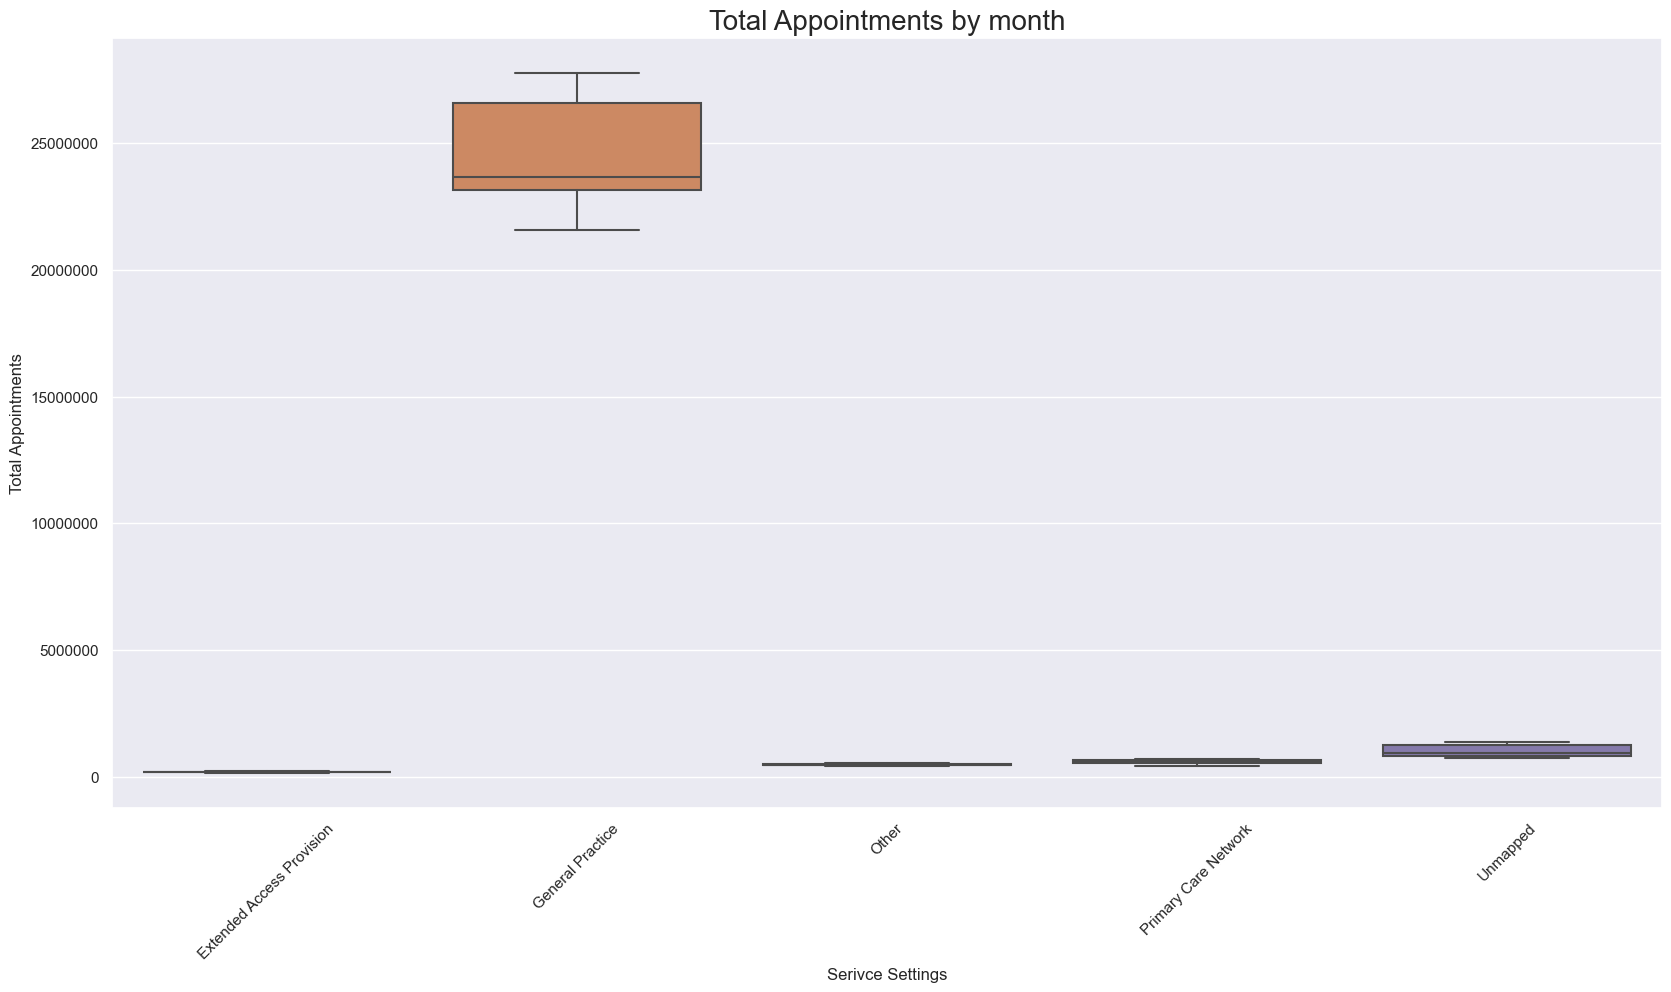

In [177]:
# Align data types
nc_agg["appointment_month"] = nc_agg["appointment_month"].astype(str)
nc_agg["count_of_appointments"] = nc_agg["count_of_appointments"].astype(int)

# Create a boxplot in Seaborn based on the new DataFrame to indicate the service settings for the number of appointments.
sns.boxplot(x="service_setting", y="count_of_appointments",data=nc_agg)
plt.title('Total Appointments by month',fontsize=20)
plt.xlabel('Serivce Settings')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)

# Remove scientific number format on y-axis
plt.ticklabel_format(style='plain', axis='y')


# Save .png
fig.savefig('all SC and appointments.png')


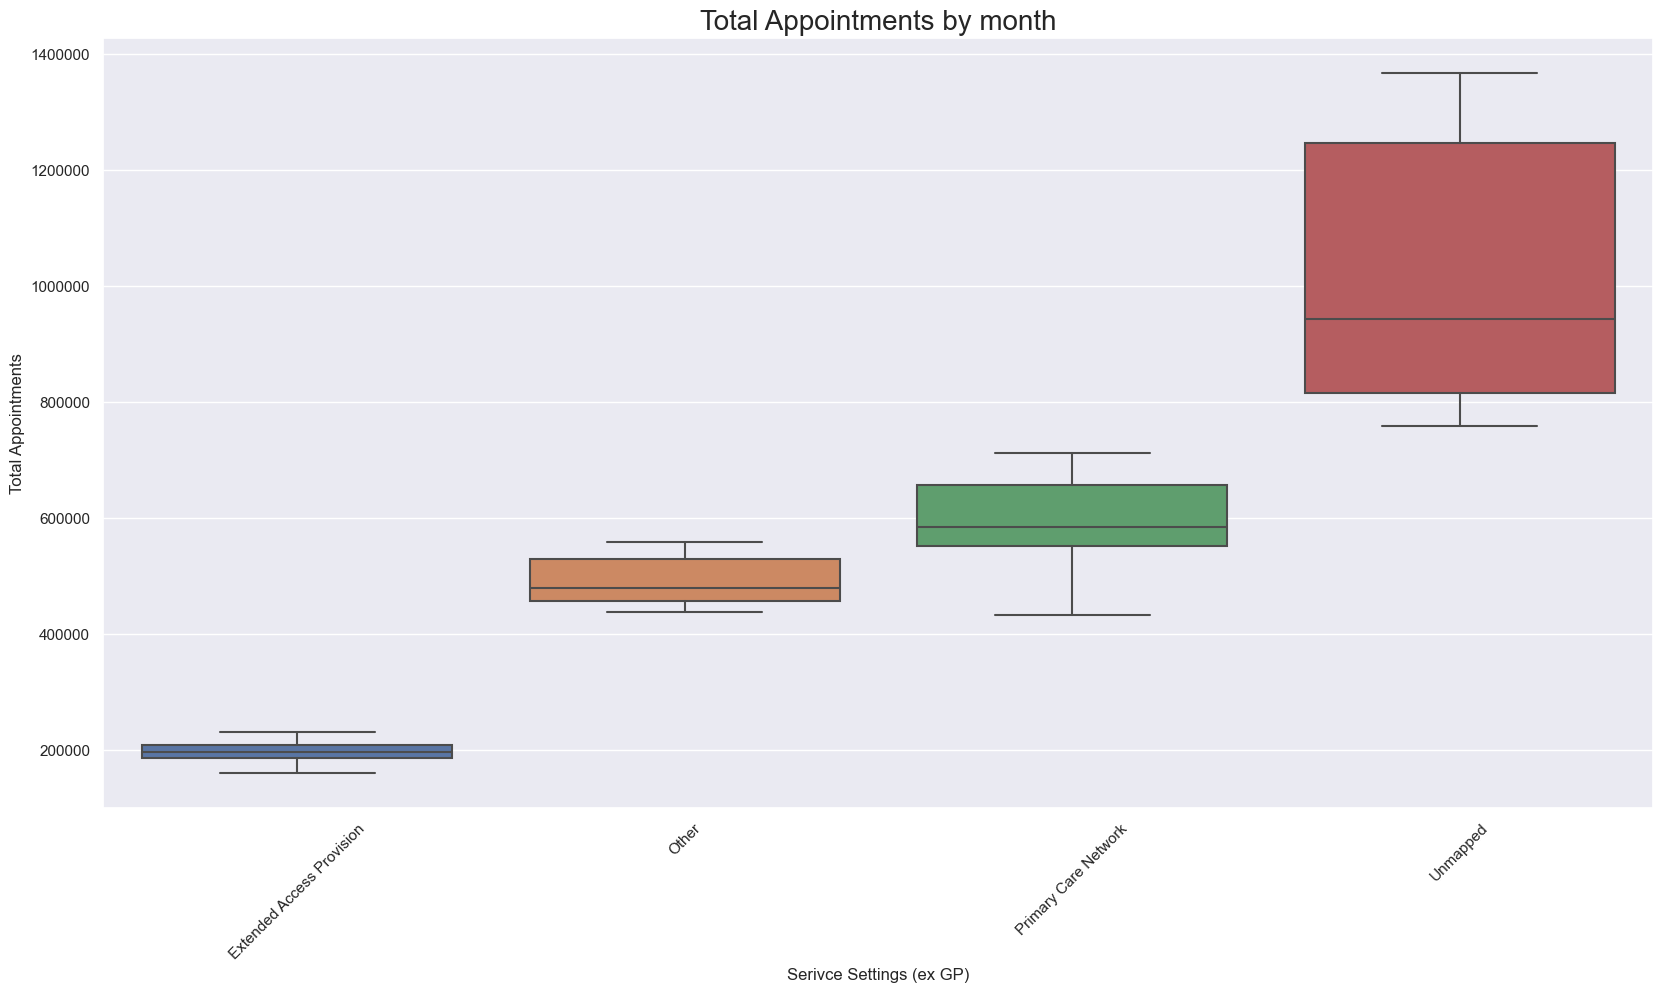

In [179]:
# Create a boxplot in Seaborn where you concentrate on all the service settings, excluding GP visits.
nc_agg_noGP = nc_agg[nc_agg["service_setting"]!="General Practice"]
sns.boxplot(x="service_setting", y="count_of_appointments",data=nc_agg_noGP)
plt.title('Total Appointments by month',fontsize=20)
plt.xlabel('Serivce Settings (ex GP)')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)

# Remove scientific number format on y-axis
plt.ticklabel_format(style='plain', axis='y')

# Save .png
fig.savefig('SC(exGP) and appointments.png')


# 

## **Reasons behind unattended appointments**

A more in-depth analysis, cross checking the relationship between different variables and unattended appointments.

In [181]:
# Review the DataFrame.
ar_agg = pd.DataFrame(ar_agg)

# View DataFrame
ar_agg


appointment_month hcp_type appointment_status appointment_mode  \
0               2020-01       GP           Attended     Face-to-Face   
1               2020-01       GP           Attended     Face-to-Face   
2               2020-01       GP           Attended     Face-to-Face   
3               2020-01       GP           Attended     Face-to-Face   
4               2020-01       GP           Attended     Face-to-Face   
...                 ...      ...                ...              ...   
10134           2022-06  Unknown            Unknown          Unknown   
10135           2022-06  Unknown            Unknown          Unknown   
10136           2022-06  Unknown            Unknown          Unknown   
10137           2022-06  Unknown            Unknown          Unknown   
10138           2022-06  Unknown            Unknown     Video/Online   

      time_between_book_and_appointment  count_of_appointments  
0                                 1 Day                 653846  
1                        15  to 21 Days                 620789  
2                           2 to 7 Days                1723834  
3                        22  to 28 Days                 421189  
4                         8  to 14 Days                1123186  
...                                 ...                    ...  
10134                     8  to 14 Days                   5494  
10135                 More than 28 Days                   5115  
10136                          Same Day                   1914  
10137            Unknown / Data Quality                     53  
10138                       2 to 7 Days                      1  

[10139 rows x 6 columns]

### **Wait time between book and appointemnt & unattended appointments**

In [183]:
# Regroup by intervals
ar_agg_total = ar_agg.groupby(['appointment_status','time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()
ar_agg_total = pd.DataFrame(ar_agg_total)
ar_agg_total

# Filter Attended
ar_agg_total_att = ar_agg_total[ar_agg_total['appointment_status'] == "Attended"]

# Filter Unattended
ar_agg_total_DNA = ar_agg_total[ar_agg_total['appointment_status'] == "DNA"]


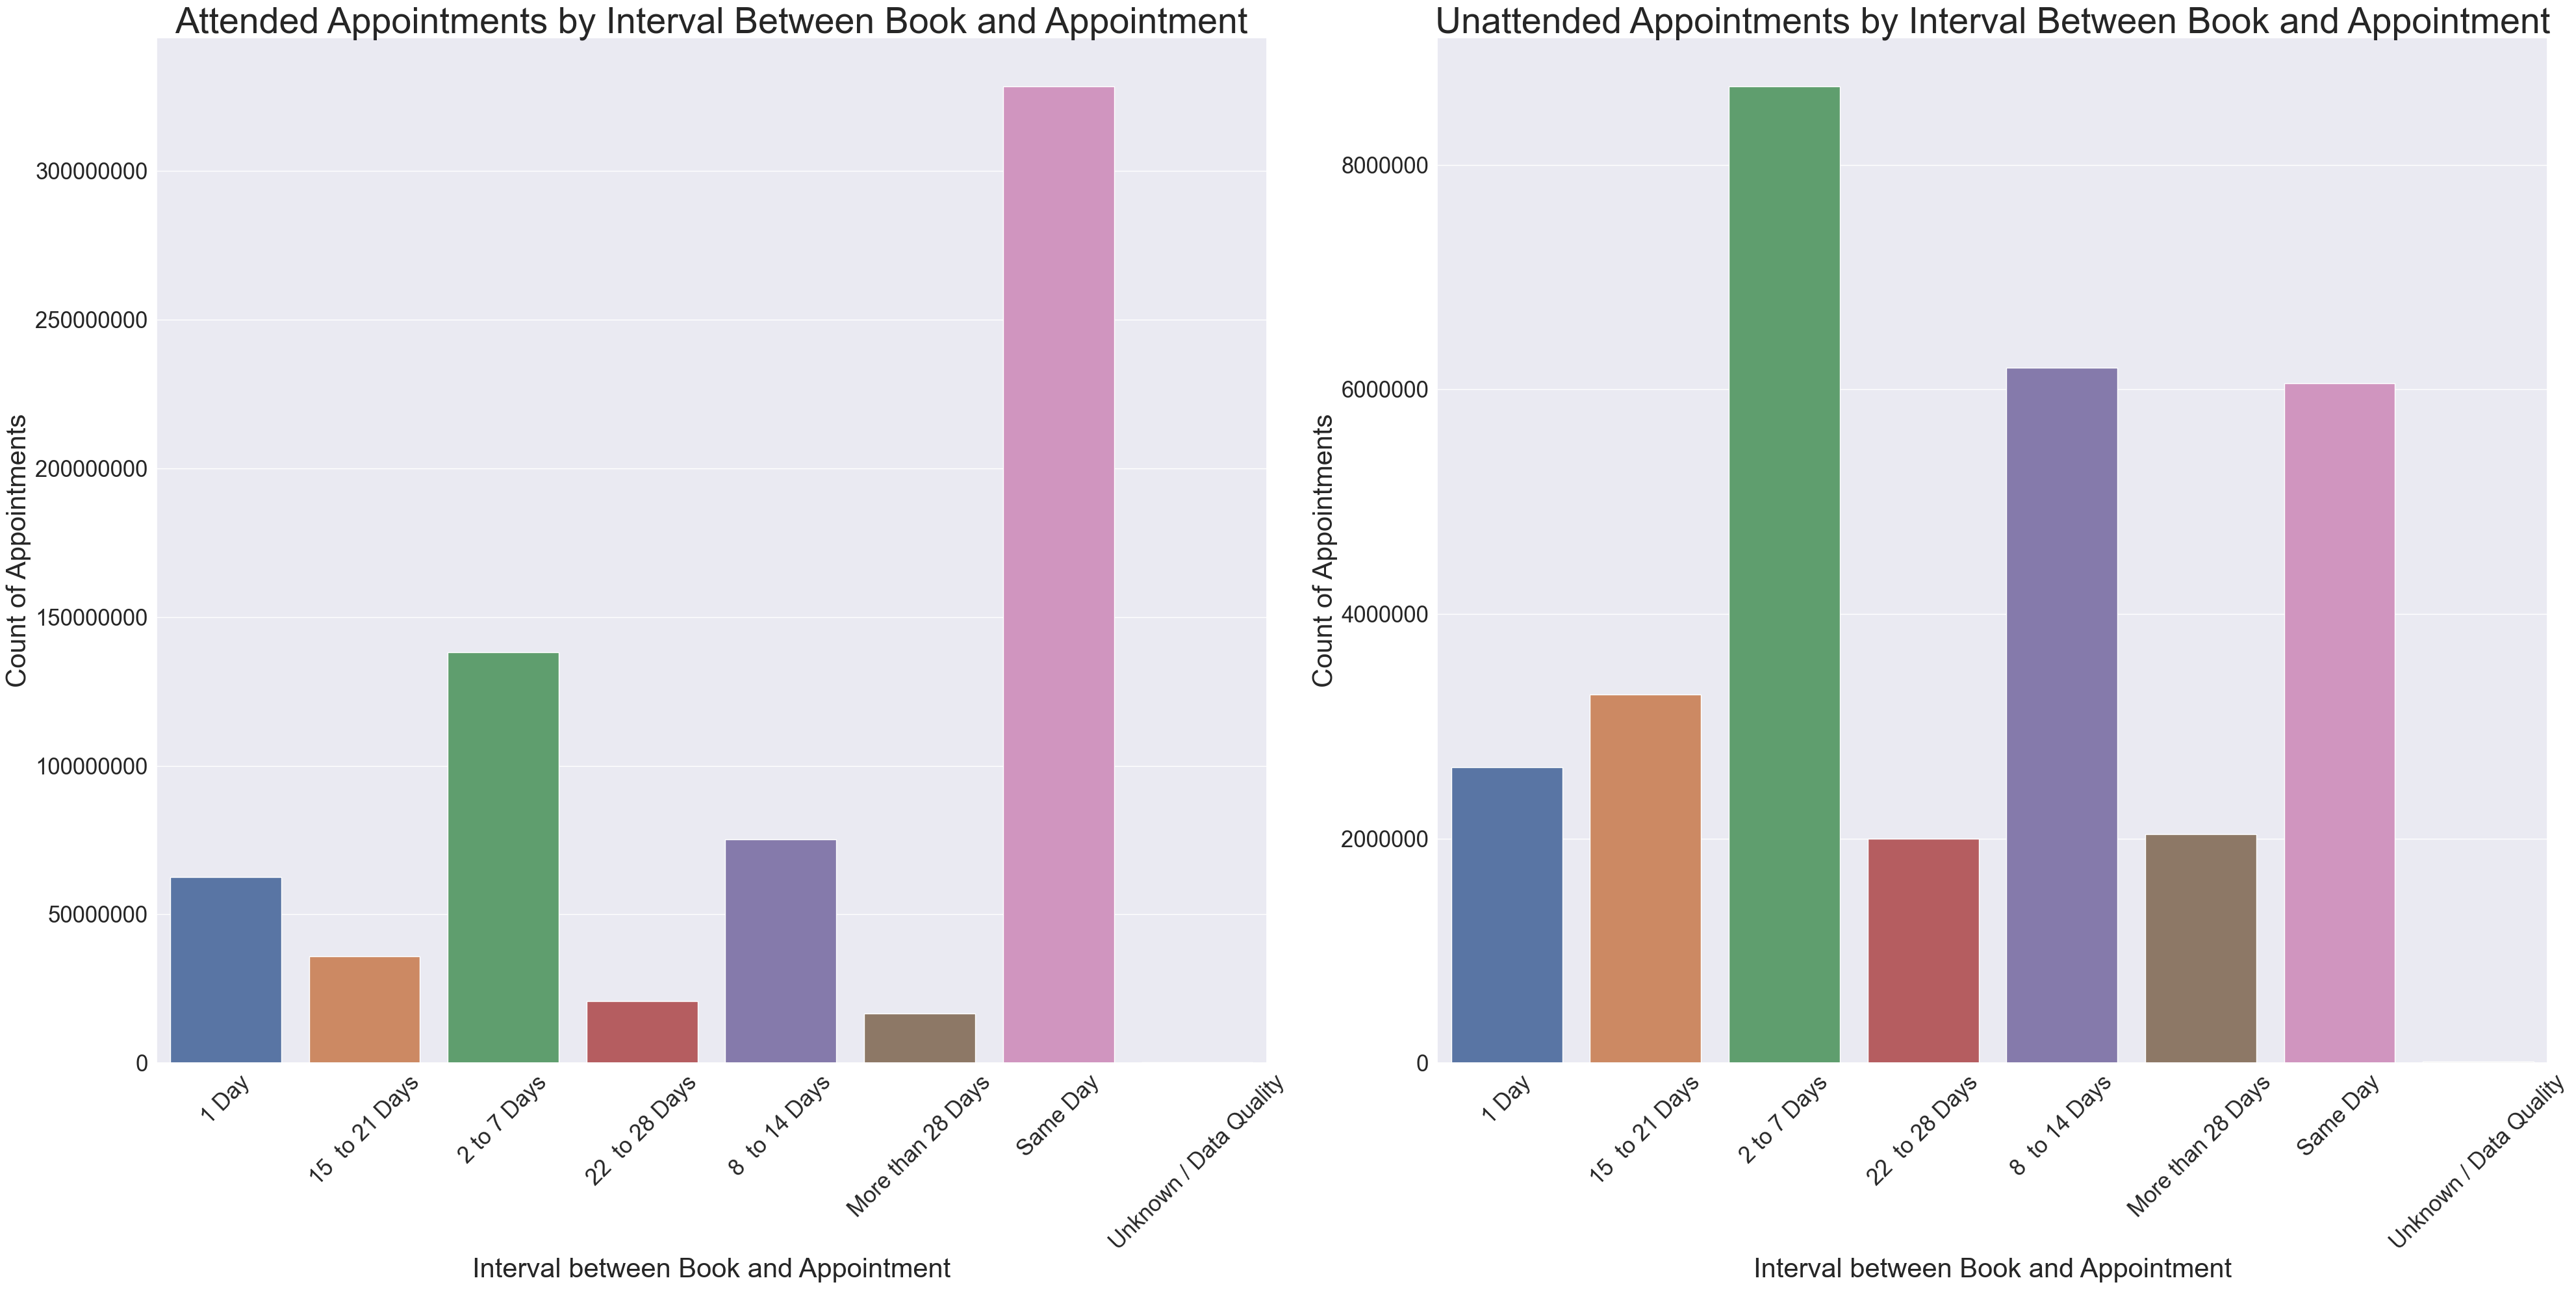

<Figure size 2000x1000 with 0 Axes>

In [185]:
# Create paralel bar plots
# Set figure size for the entire figure.
fig, axes = plt.subplots(1, 2, figsize=(40, 20), sharey=False)

# Barplot for DNA (Unattended appointments)
sns.barplot(x="time_between_book_and_appointment", y="count_of_appointments", data=ar_agg_total_att, errorbar=None, ax=axes[0])
axes[0].set_title('Attended Appointments by Interval Between Book and Appointment',fontsize= 40)
axes[0].set_xlabel('Interval between Book and Appointment',fontsize= 30)
axes[0].set_ylabel('Count of Appointments',fontsize= 30)
axes[0].tick_params(axis='x', rotation=45, labelsize=25)
axes[0].tick_params(axis='y', labelsize=25)
axes[0].ticklabel_format(style='plain', axis='y')


# Barplot for Attend (Attended appointments)
sns.barplot(x="time_between_book_and_appointment", y="count_of_appointments", data=ar_agg_total_DNA, errorbar=None, ax=axes[1])
axes[1].set_title('Unattended Appointments by Interval Between Book and Appointment',fontsize= 40)
axes[1].set_xlabel('Interval between Book and Appointment',fontsize= 30)
axes[1].set_ylabel('Count of Appointments',fontsize= 30)
axes[1].tick_params(axis='x', rotation=45, labelsize=25)
axes[1].tick_params(axis='y', labelsize=25)
axes[1].ticklabel_format(style='plain', axis='y')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### **HCP & unattended appointments**

In [187]:
# Regroup by HCP
ar_agg_hcp = ar_agg.groupby(['appointment_status','hcp_type'])['count_of_appointments'].sum().reset_index()
ar_agg_hcp = pd.DataFrame(ar_agg_hcp)

# Filter Attended
ar_agg_hcp_att = ar_agg_hcp[ar_agg_hcp['appointment_status'] == "Attended"]

# Filter DNA
ar_agg_hcp_DNA = ar_agg_hcp[ar_agg_hcp['appointment_status'] == "DNA"]


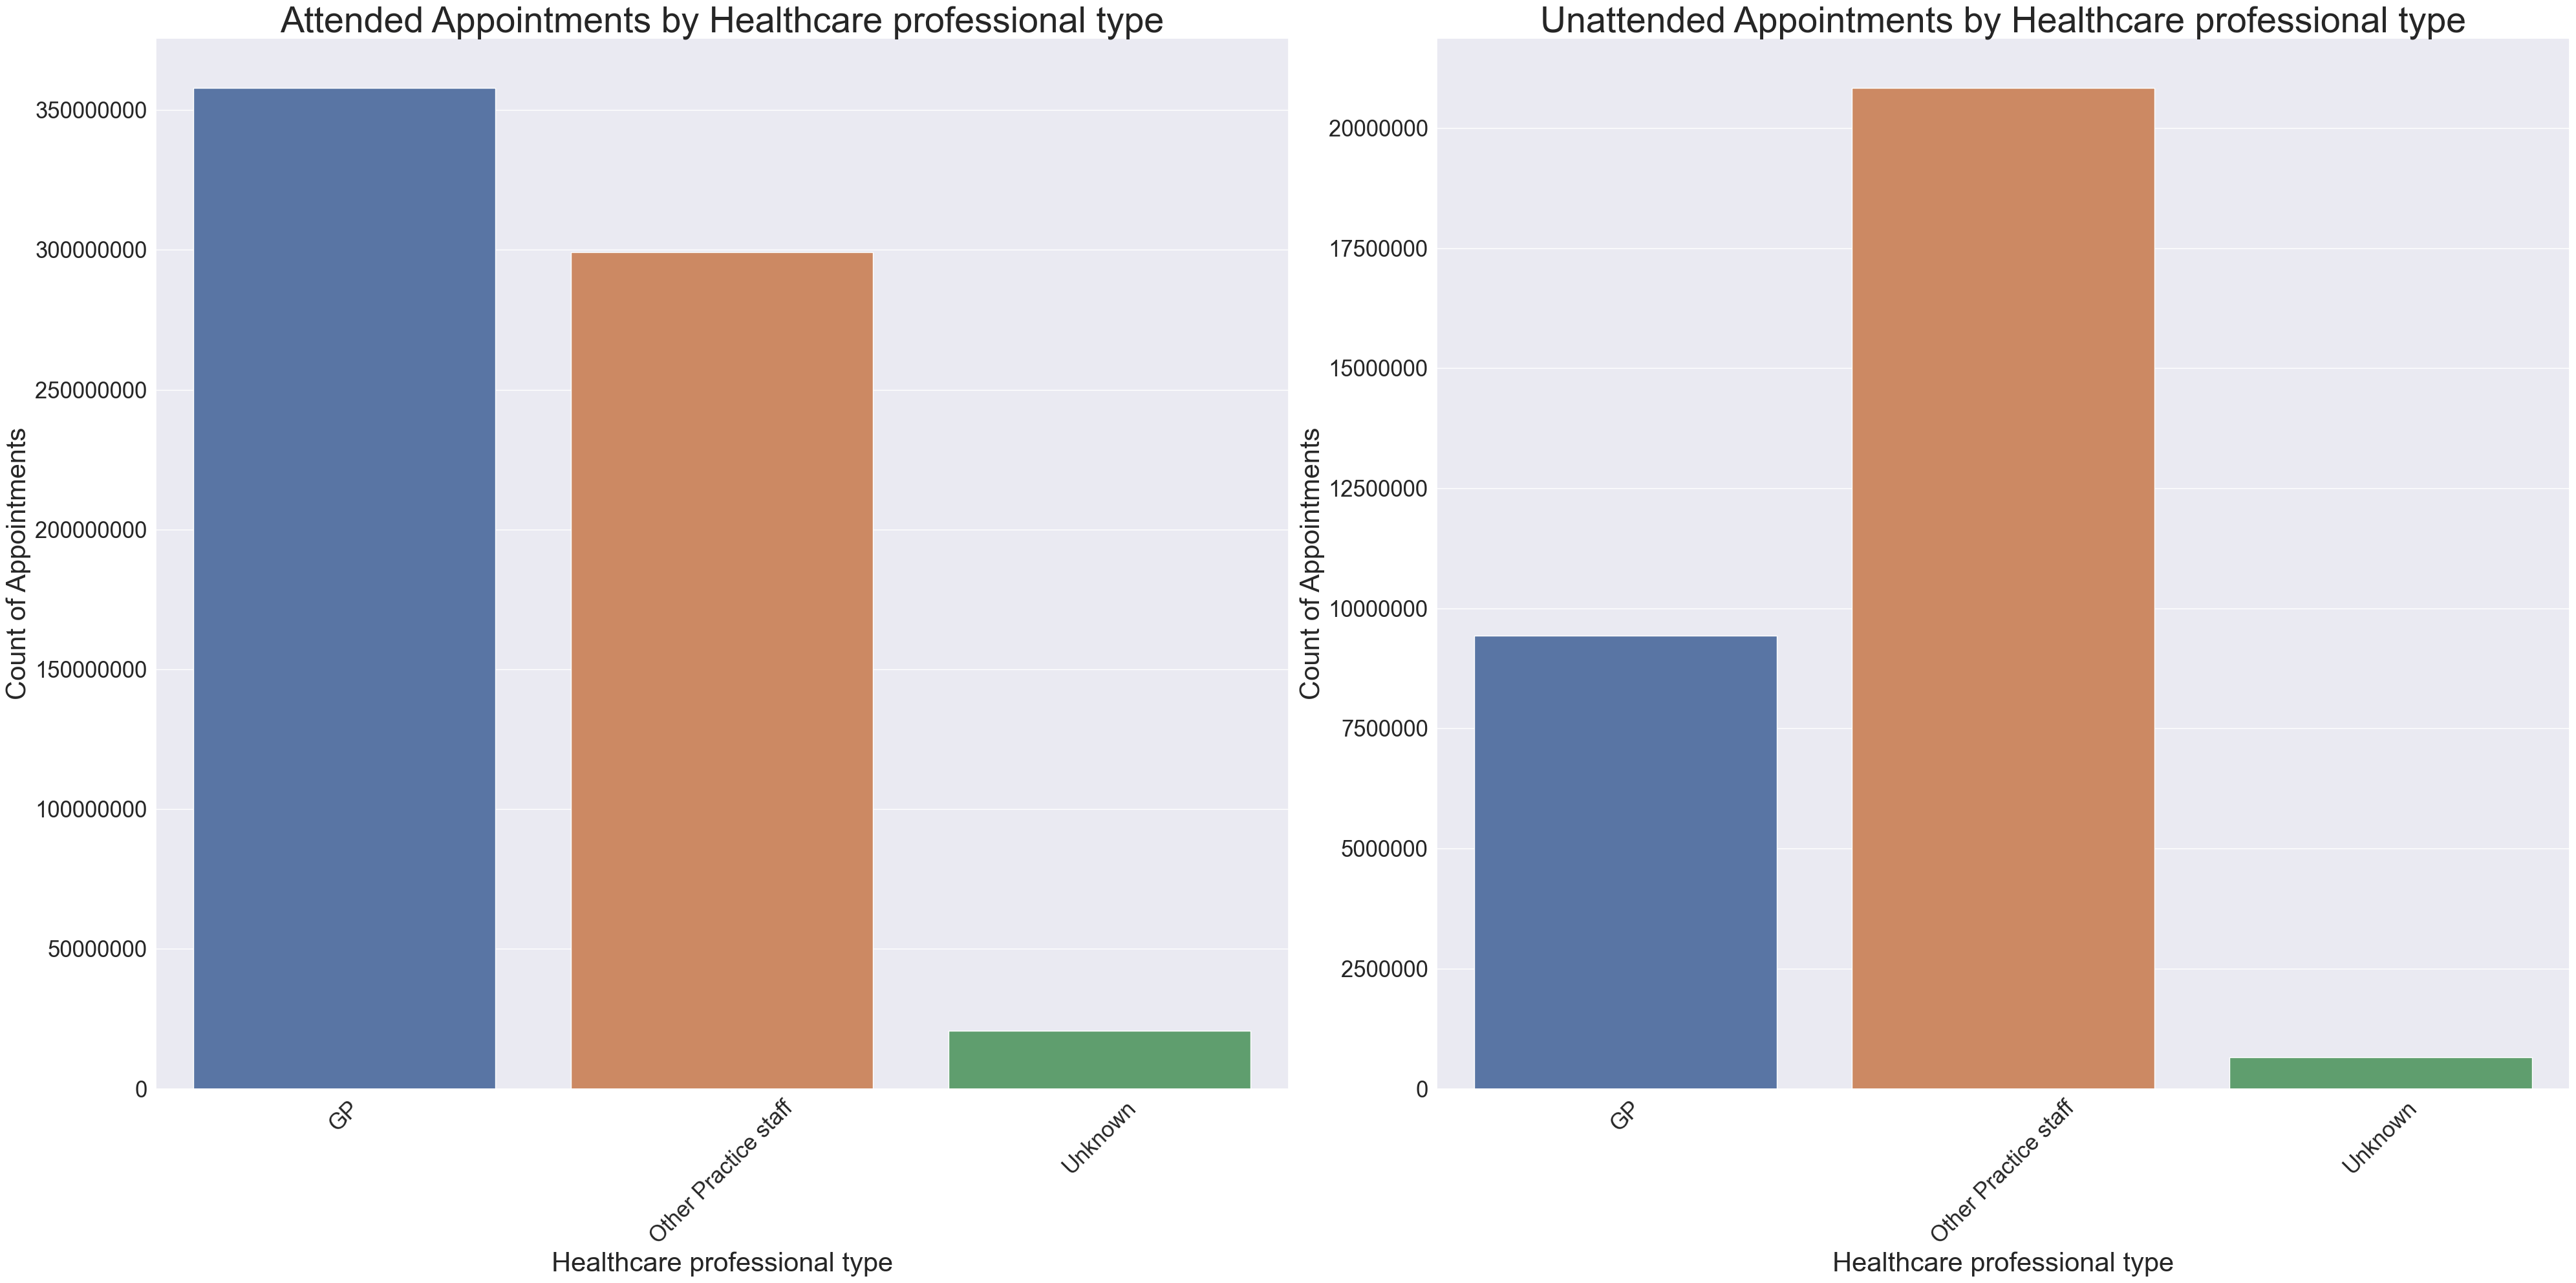

In [189]:
# Set figure size for the entire figure.
fig, axes = plt.subplots(1, 2, figsize=(40, 20), sharey=False)

# Barplot for attended appointments
sns.barplot(x="hcp_type", y="count_of_appointments", data=ar_agg_hcp_att, errorbar=None, ax=axes[0])
axes[0].set_title('Attended Appointments by Healthcare professional type',fontsize= 40)
axes[0].set_xlabel('Healthcare professional type',fontsize= 30)
axes[0].set_ylabel('Count of Appointments',fontsize= 30)
axes[0].tick_params(axis='x', rotation=45, labelsize=25)
axes[0].tick_params(axis='y', labelsize=25)
axes[0].ticklabel_format(style='plain', axis='y')


# Barplot for DNA (Unattended appointments)
sns.barplot(x="hcp_type", y="count_of_appointments", data=ar_agg_hcp_DNA, errorbar=None, ax=axes[1])
axes[1].set_title('Unattended Appointments by Healthcare professional type',fontsize= 40)
axes[1].set_xlabel('Healthcare professional type',fontsize= 30)
axes[1].set_ylabel('Count of Appointments',fontsize= 30)
axes[1].tick_params(axis='x', rotation=45, labelsize=25)
axes[1].tick_params(axis='y', labelsize=25)
axes[1].ticklabel_format(style='plain', axis='y')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### **Calendar Month & unattended appointments**

In [191]:
# Regroup by month
ar_agg_month = ar_agg.groupby(['appointment_status','appointment_month'])['count_of_appointments'].sum().reset_index()
ar_agg_month = pd.DataFrame(ar_agg_month)

# Filter Attended
ar_agg_month_att = ar_agg_month[ar_agg_month['appointment_status'] == "Attended"]

# Filter DNA
ar_agg_month_DNA = ar_agg_month[ar_agg_month['appointment_status'] == "DNA"]


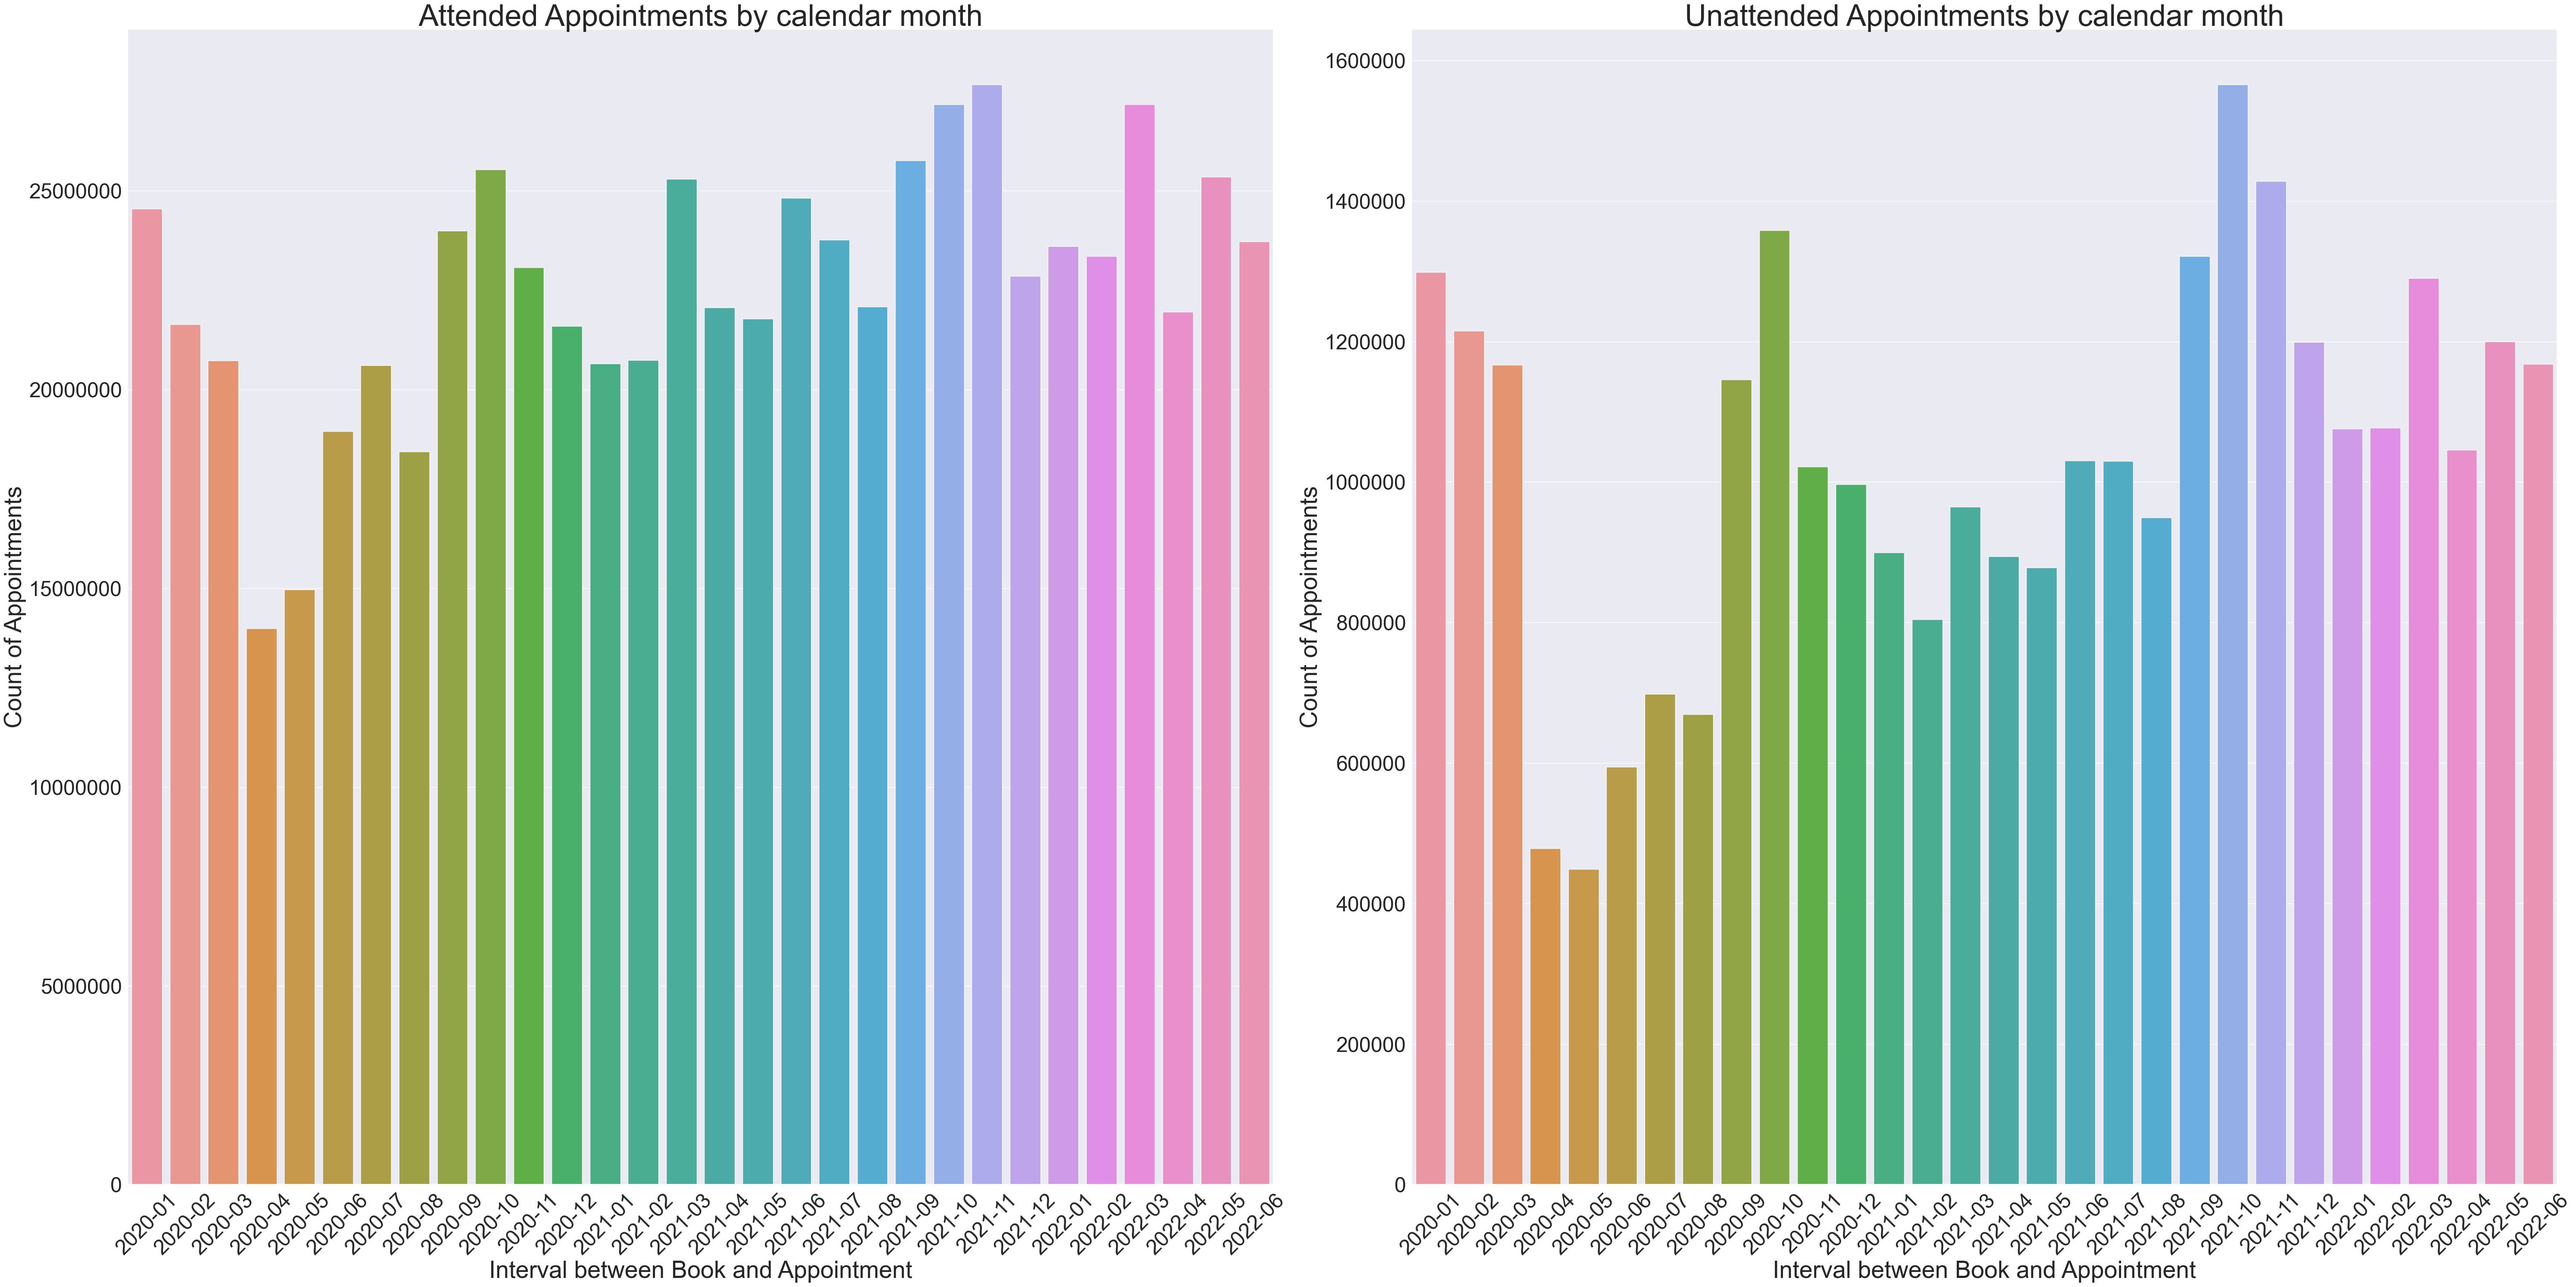

<Figure size 2000x1000 with 0 Axes>

In [215]:
# Set figure size for the entire figure.
fig, axes = plt.subplots(1, 2, figsize=(60, 30), sharey=False)

# Barplot for DNA (Unattended appointments)
sns.barplot(x="appointment_month", y="count_of_appointments", data=ar_agg_month_att, errorbar=None, ax=axes[0])
axes[0].set_title('Attended Appointments by calendar month',fontsize= 50)
axes[0].set_xlabel('Interval between Book and Appointment',fontsize= 40)
axes[0].set_ylabel('Count of Appointments',fontsize= 40)
axes[0].tick_params(axis='x', rotation=45, labelsize=35)
axes[0].tick_params(axis='y', labelsize=35)
axes[0].ticklabel_format(style='plain', axis='y')


# Barplot for Attend (Attended appointments)
sns.barplot(x="appointment_month", y="count_of_appointments", data=ar_agg_month_DNA, errorbar=None, ax=axes[1])
axes[1].set_title('Unattended Appointments by calendar month',fontsize= 50)
axes[1].set_xlabel('Interval between Book and Appointment',fontsize= 40)
axes[1].set_ylabel('Count of Appointments',fontsize= 40)
axes[1].tick_params(axis='x', rotation=45, labelsize=35)
axes[1].tick_params(axis='y', labelsize=35)
axes[1].ticklabel_format(style='plain', axis='y')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### **Different layers of locations & unattended appointments**

In [195]:
# Regroup data by location
ar_location = ar.groupby(["icb_ons_code", "appointment_status", \
                        "appointment_mode", "time_between_book_and_appointment"])["count_of_appointments"].sum().reset_index()

# View new DataFrame
ar_location


icb_ons_code appointment_status appointment_mode  \
0       E54000008           Attended     Face-to-Face   
1       E54000008           Attended     Face-to-Face   
2       E54000008           Attended     Face-to-Face   
3       E54000008           Attended     Face-to-Face   
4       E54000008           Attended     Face-to-Face   
...           ...                ...              ...   
4934    E54000062            Unknown     Video/Online   
4935    E54000062            Unknown     Video/Online   
4936    E54000062            Unknown     Video/Online   
4937    E54000062            Unknown     Video/Online   
4938    E54000062            Unknown     Video/Online   

     time_between_book_and_appointment  count_of_appointments  
0                                1 Day                1741540  
1                       15  to 21 Days                 994231  
2                          2 to 7 Days                3651848  
3                       22  to 28 Days                 563036  
4                        8  to 14 Days                2094630  
...                                ...                    ...  
4934                    22  to 28 Days                    278  
4935                     8  to 14 Days                    420  
4936                 More than 28 Days                    600  
4937                          Same Day                    261  
4938            Unknown / Data Quality                      6  

[4939 rows x 5 columns]

In [197]:
# Merge columns in ar & ad tables to craete a new DataFrame
ar_location_region = pd.merge(ar_location[['icb_ons_code','appointment_status','count_of_appointments']],ad[['icb_ons_code','region_ons_code']],how='left', on ='icb_ons_code')

# Regroup data in the new DataFrame
ar_location_region = ar_location_region.groupby(['region_ons_code','appointment_status'])["count_of_appointments"].sum().reset_index()

# View new DataFrame
ar_location_region


region_ons_code appointment_status  count_of_appointments
0        E40000003           Attended           139835924066
1        E40000003                DNA             7804244432
2        E40000003            Unknown             6558847526
3        E40000005           Attended           282796526071
4        E40000005                DNA            12159585751
5        E40000005            Unknown            13612850636
6        E40000006           Attended           103927286243
7        E40000006                DNA             4165918751
8        E40000006            Unknown             5366319281
9        E40000007           Attended           255205083119
10       E40000007                DNA             8781416489
11       E40000007            Unknown            13103560060
12       E40000010           Attended           893853603160
13       E40000010                DNA            51755634748
14       E40000010            Unknown            49265661112
15       E40000011           Attended           308711031905
16       E40000011                DNA            14408066068
17       E40000011            Unknown            15521258443
18       E40000012           Attended           859686375966
19       E40000012                DNA            33889214452
20       E40000012            Unknown            45208617655

Regions and unattended appointments

In [199]:
# Filter Attended
ar_region_att = ar_location_region[ar_location_region['appointment_status'] == "Attended"]
print(ar_region_att)

# Filter DNA
ar_region_DNA = ar_location_region[ar_location_region['appointment_status'] == "DNA"]
print(ar_region_DNA)


   region_ons_code appointment_status  count_of_appointments
0        E40000003           Attended           139835924066
3        E40000005           Attended           282796526071
6        E40000006           Attended           103927286243
9        E40000007           Attended           255205083119
12       E40000010           Attended           893853603160
15       E40000011           Attended           308711031905
18       E40000012           Attended           859686375966
   region_ons_code appointment_status  count_of_appointments
1        E40000003                DNA             7804244432
4        E40000005                DNA            12159585751
7        E40000006                DNA             4165918751
10       E40000007                DNA             8781416489
13       E40000010                DNA            51755634748
16       E40000011                DNA            14408066068
19       E40000012                DNA            33889214452


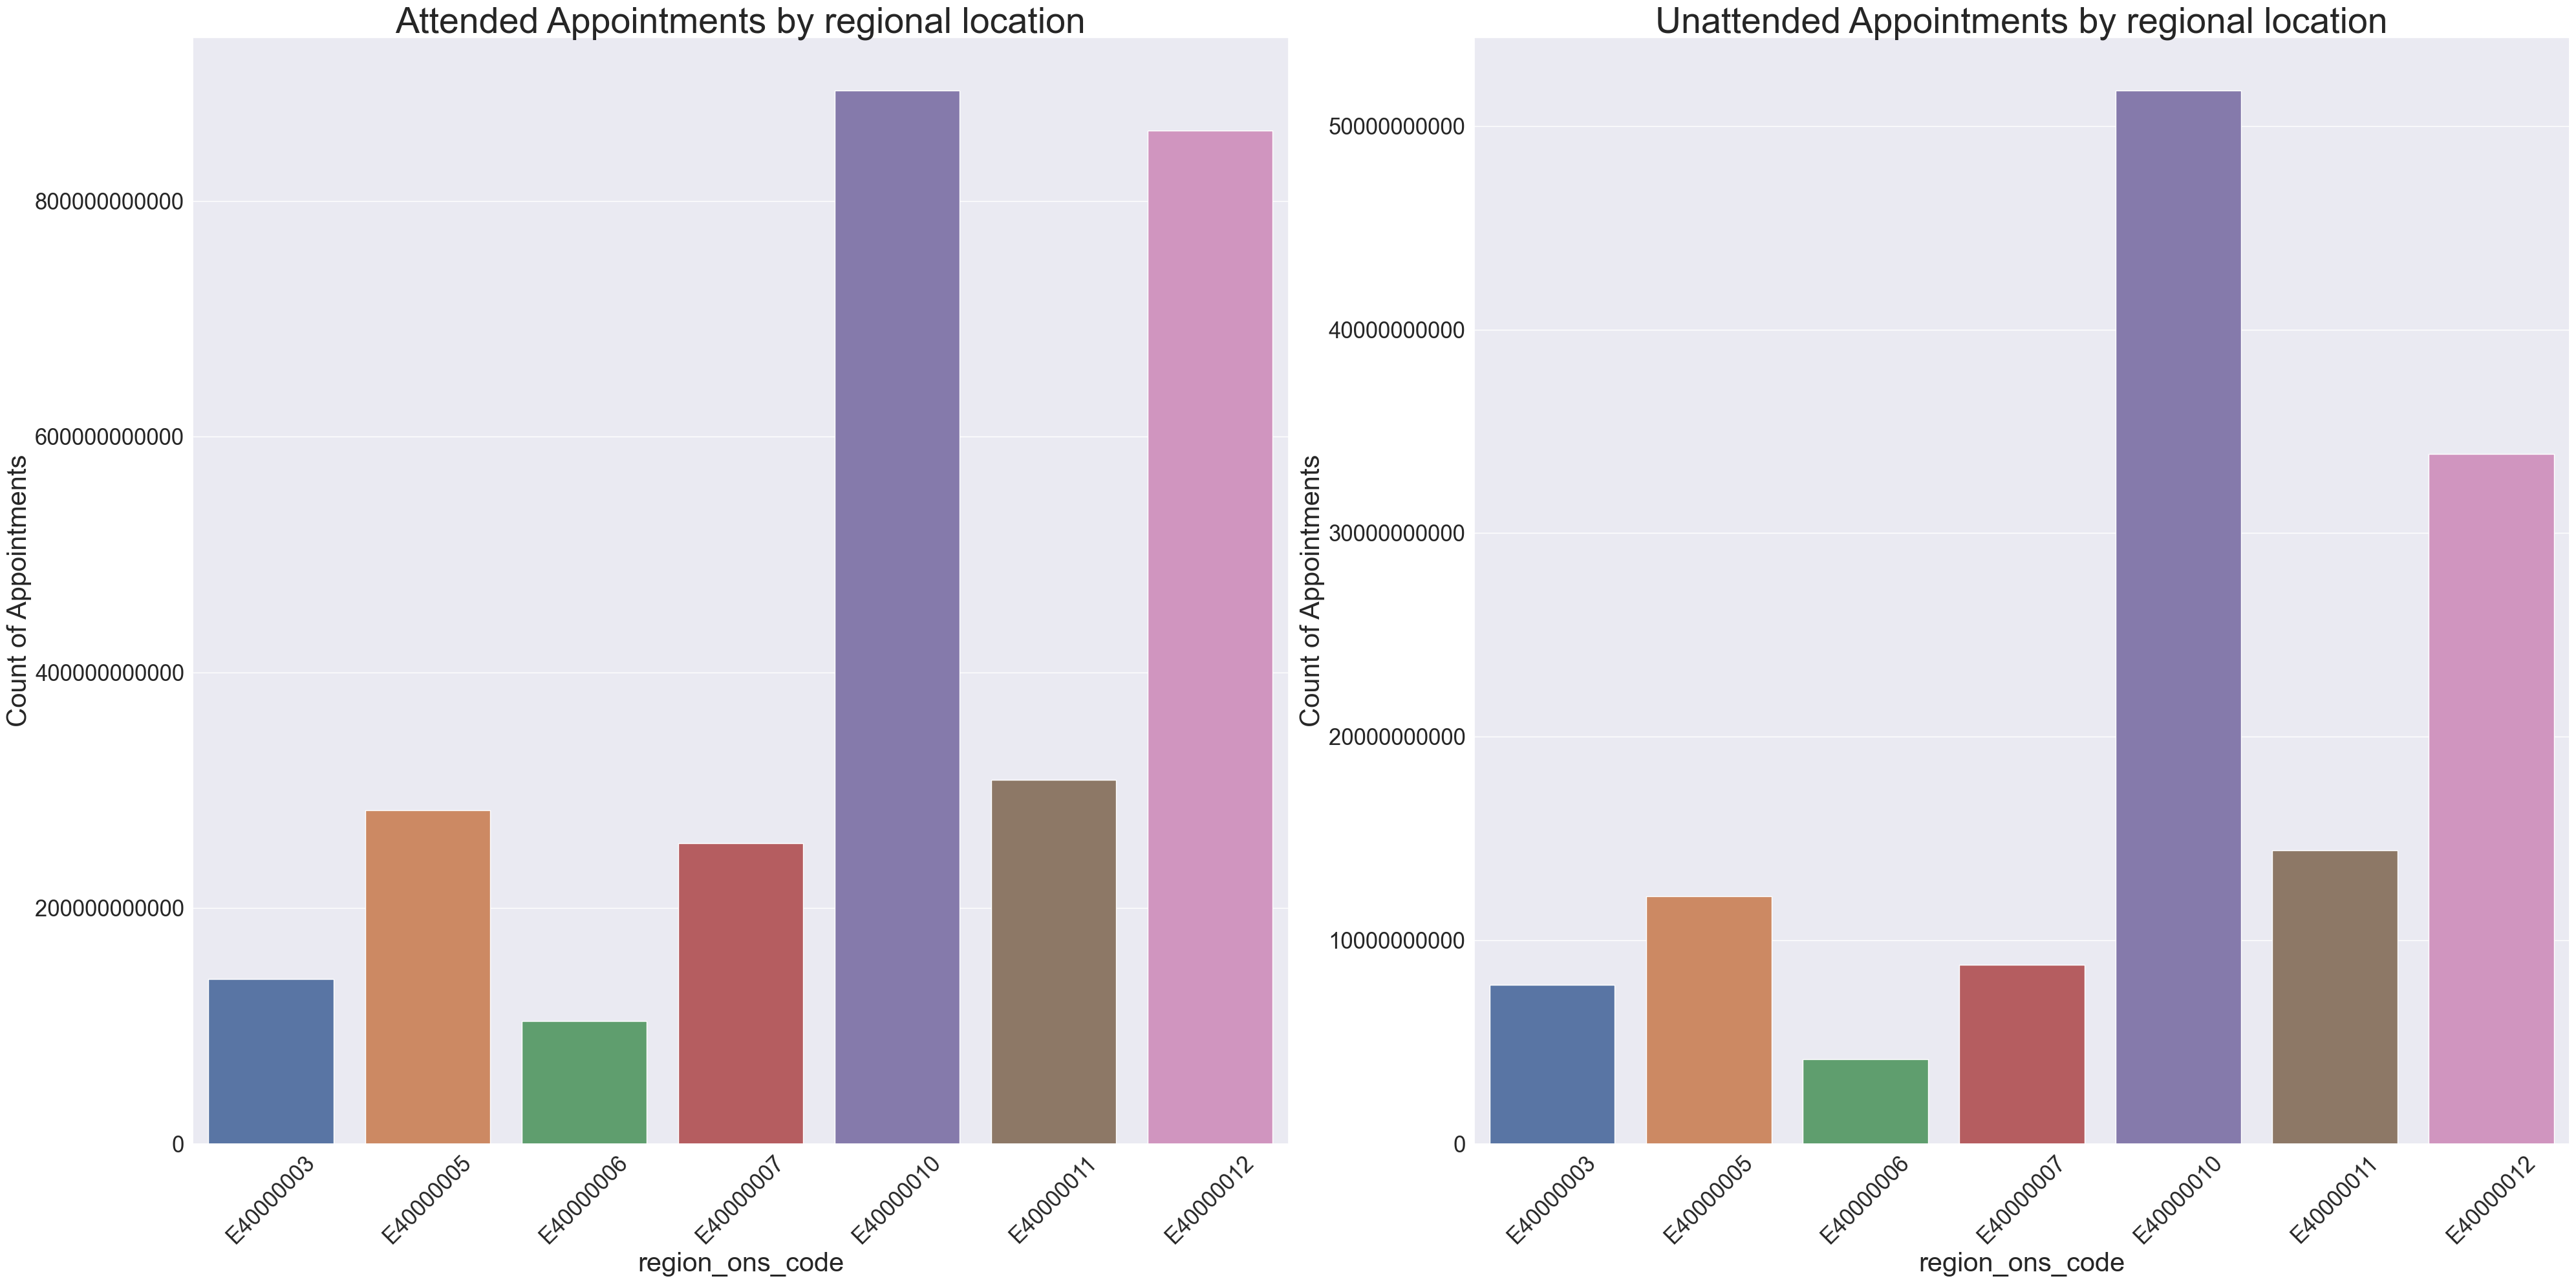

<Figure size 2000x1000 with 0 Axes>

In [201]:
# Set figure size for the entire figure.
fig, axes = plt.subplots(1, 2, figsize=(40, 20), sharey=False)  # 1 row, 2 columns

# Barplot for Attended appointments
sns.barplot(x="region_ons_code", y="count_of_appointments", data=ar_region_att, errorbar=None, ax=axes[0])
axes[0].set_title('Attended Appointments by regional location',fontsize= 40)
axes[0].set_xlabel('region_ons_code',fontsize= 30)
axes[0].set_ylabel('Count of Appointments',fontsize= 30)
axes[0].tick_params(axis='x', rotation=45, labelsize=25)
axes[0].tick_params(axis='y', labelsize=25)
axes[0].ticklabel_format(style='plain', axis='y')

# Barplot for Unattended appointments)
sns.barplot(x="region_ons_code", y="count_of_appointments", data=ar_region_DNA, errorbar=None, ax=axes[1])
axes[1].set_title('Unattended Appointments by regional location',fontsize= 40)
axes[1].set_xlabel('region_ons_code',fontsize= 30)
axes[1].set_ylabel('Count of Appointments',fontsize= 30)
axes[1].tick_params(axis='x', rotation=45, labelsize=25)
axes[1].tick_params(axis='y', labelsize=25)
axes[1].ticklabel_format(style='plain', axis='y')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


ICB regions and unattended appointments

In [203]:
# Filter Attended
ar_location_att = ar_location[ar_location['appointment_status'] == "Attended"]
print(ar_location_att)

# Filter DNA
ar_location_DNA = ar_location[ar_location['appointment_status'] == "DNA"]
print(ar_location_DNA)


     icb_ons_code appointment_status appointment_mode  \
0       E54000008           Attended     Face-to-Face   
1       E54000008           Attended     Face-to-Face   
2       E54000008           Attended     Face-to-Face   
3       E54000008           Attended     Face-to-Face   
4       E54000008           Attended     Face-to-Face   
...           ...                ...              ...   
4856    E54000062           Attended     Video/Online   
4857    E54000062           Attended     Video/Online   
4858    E54000062           Attended     Video/Online   
4859    E54000062           Attended     Video/Online   
4860    E54000062           Attended     Video/Online   

     time_between_book_and_appointment  count_of_appointments  
0                                1 Day                1741540  
1                       15  to 21 Days                 994231  
2                          2 to 7 Days                3651848  
3                       22  to 28 Days                 5630

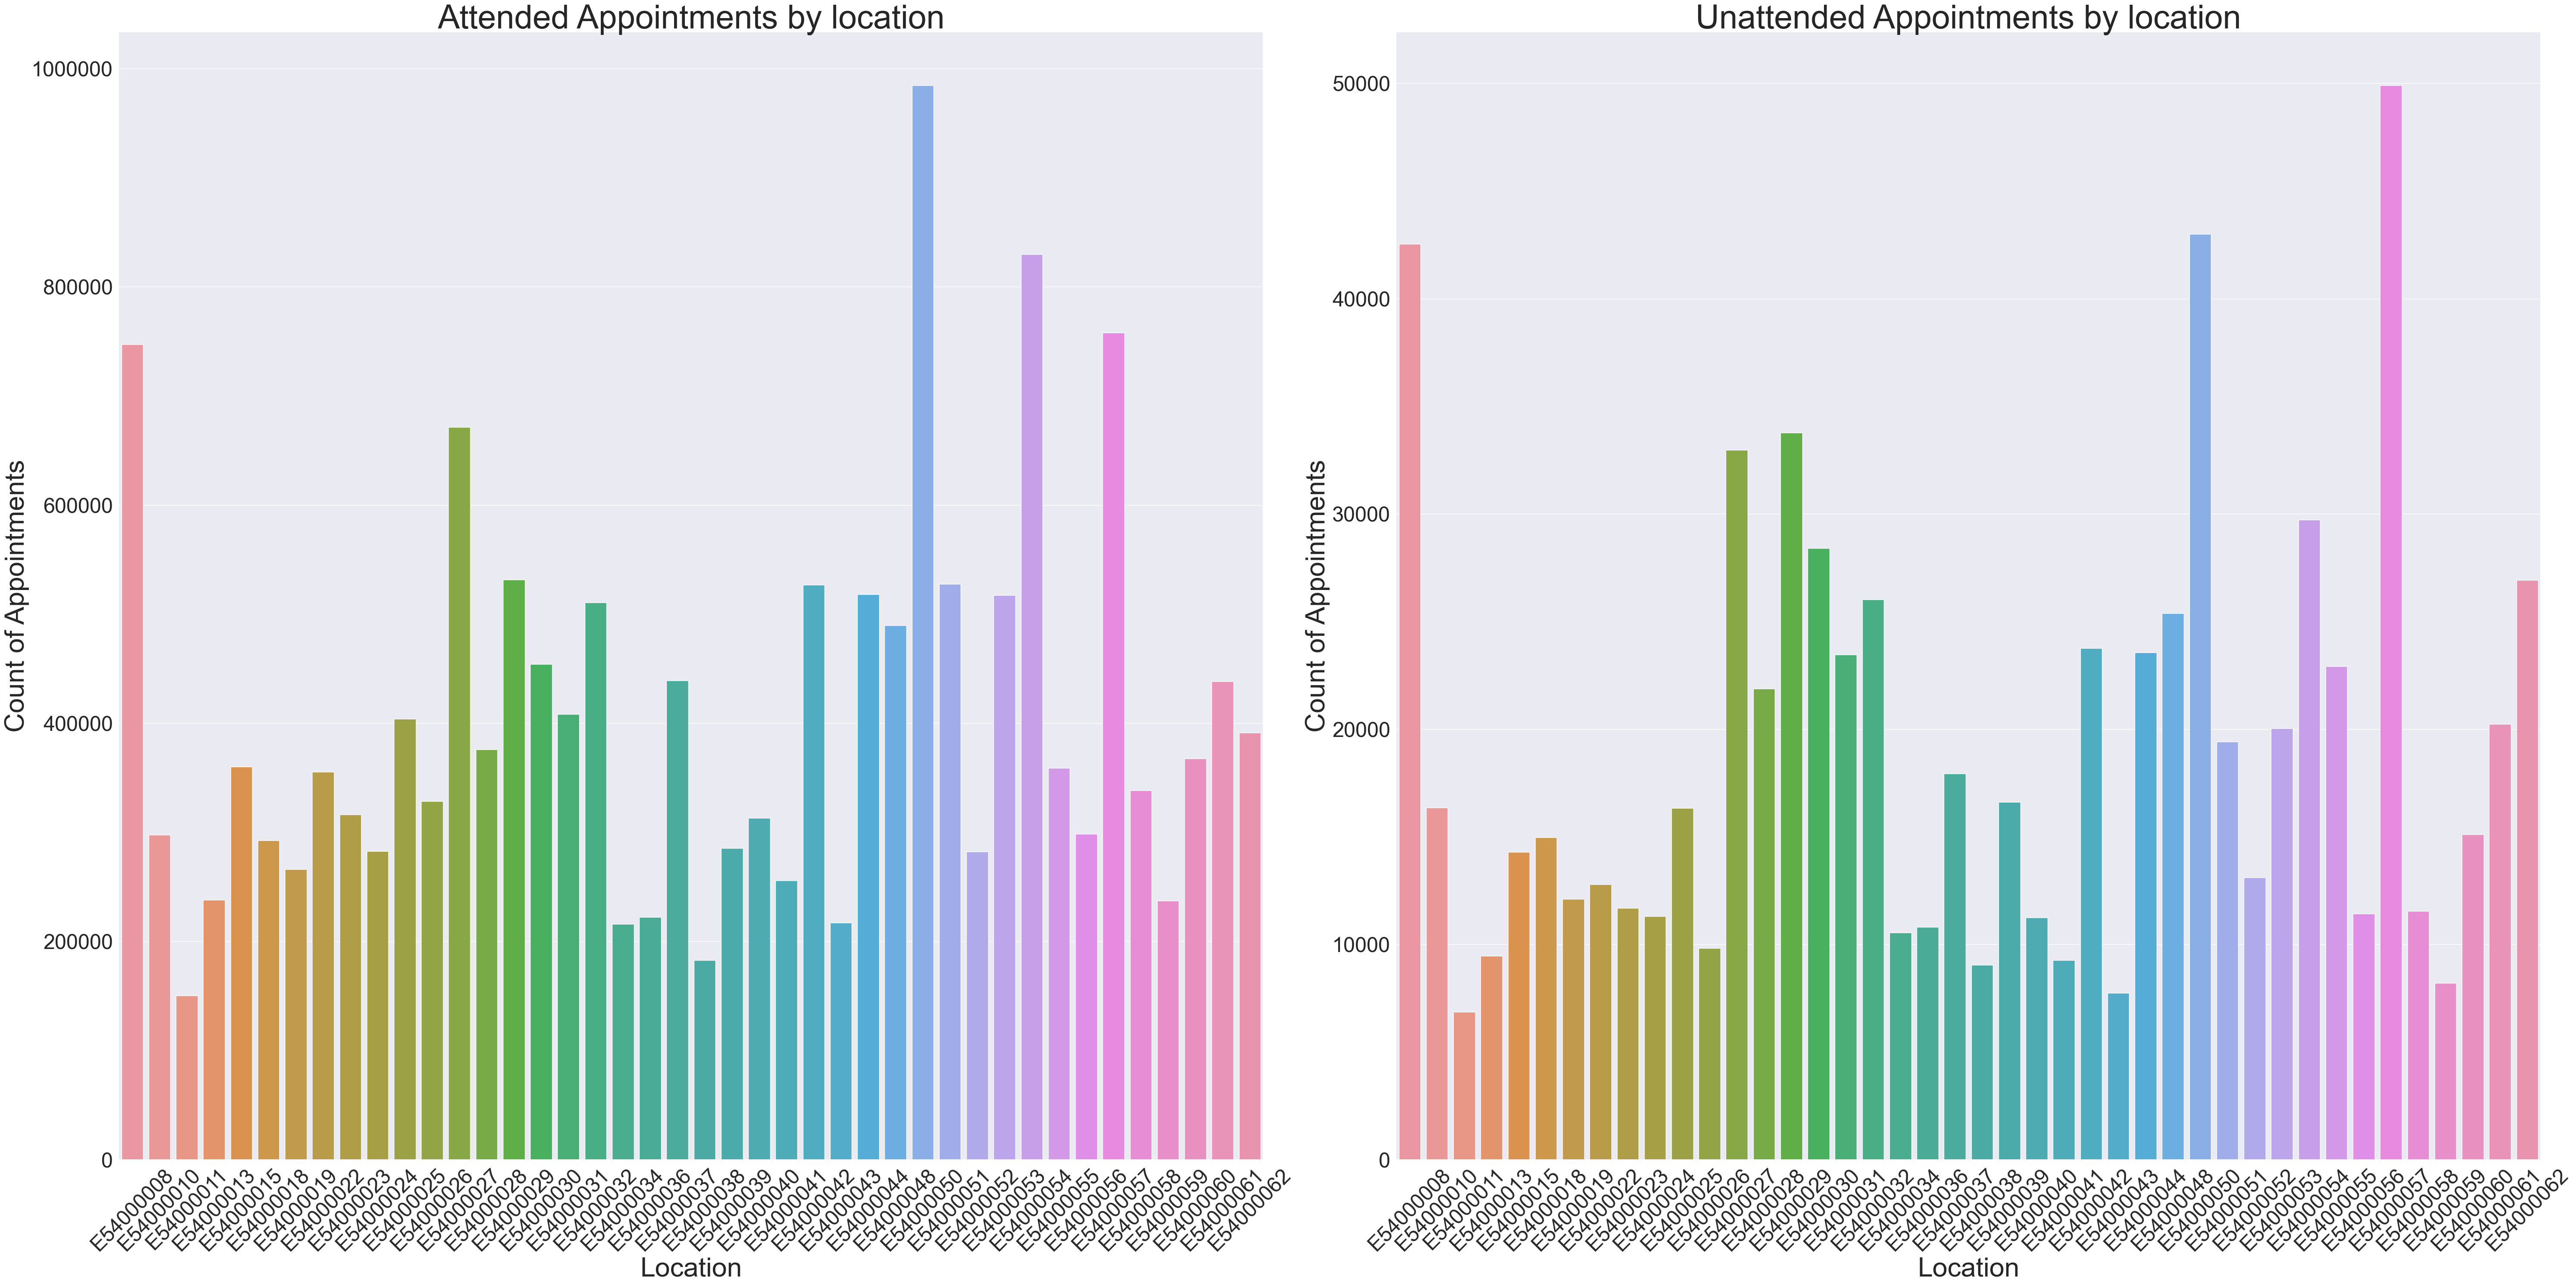

In [211]:
# Set figure size for the entire figure.
fig, axes = plt.subplots(1, 2, figsize=(60, 30), sharey=False) 

# Barplot for Attended appointments
sns.barplot(x="icb_ons_code", y="count_of_appointments", data=ar_location_att, errorbar=None, ax=axes[0])
axes[0].set_title('Attended Appointments by location',fontsize= 55)
axes[0].set_xlabel('Location',fontsize= 45)
axes[0].set_ylabel('Count of Appointments',fontsize= 45)
axes[0].tick_params(axis='x', rotation=45, labelsize=35)
axes[0].tick_params(axis='y', labelsize=35)
axes[0].ticklabel_format(style='plain', axis='y')


# Barplot for Unattended appointments)
sns.barplot(x="icb_ons_code", y="count_of_appointments", data=ar_location_DNA, errorbar=None, ax=axes[1])
axes[1].set_title('Unattended Appointments by location',fontsize= 55)
axes[1].set_xlabel('Location',fontsize= 45)
axes[1].set_ylabel('Count of Appointments',fontsize= 45)
axes[1].tick_params(axis='x', rotation=45, labelsize=35)
axes[1].tick_params(axis='y', labelsize=35)
axes[1].ticklabel_format(style='plain', axis='y')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# 

## **A summary of findings and recommendations based on the analysis.**


> **Findings:**

**1. Staffing and Capacity Shortages:** Post-pandemic, the NHS has faced significant staffing and capacity challenges.

**2. Seasonal Appointment Peaks:** Appointments typically peak during spring and autumn.

**3. Weekly Appointment Variation:** The number of appointments varies by the day of the week, with fewer appointments on weekends, Thursdays, and Fridays.

**4. Missed Appointments Patterns:** Missed appointments are influenced by the wait time between booking and the appointment, as well as the type of healthcare professional. Some regions have less unattended appointments compared to other regions.

**5. Uncategorized Data:** A significant portion of the data remains uncategorized, indicating a need for data cleaning and remapping.



> **Recommendations:**

Based on the findings and trends mentioned above, these recommendations would be helpful in responding to the issues in the NHS highlighted in this analysis project:
**
1.	Increase the Number of Sta**f\f 
Gradually hire more healthcare professionals to meet the increased demand post-pandemic.** 

2.	Optimize Resource Alloc** \ation
Consider flexible staffing or temporary solutions during these peak periods. 
Even out appointments on less busy days like Thursdays and F \ridays.
Encourage non-urgent appointments to be scheduled during this time to balance the wor**kload.

3.	Improve Appointment ** \Management
Prioritize same-day appointment to reduce the likelihood of missed appointments. Hide the healthcare professional type at the time of booking to reduce potentia**l biases.

4.	Enhance Data Quality an** \d Consistency
A significant portion of the data remains uncategorized, unknown, or unmapped, indicating a need for data quality\ improvement. 
Establish SOPs for data entry and continue to improve the data recording system to ensure data accuracy, consistency, and reliability in future d**ata analysis.

5.	Introduce Penal** \ties for No-Shows
Implement penalties for patients who repeatedly miss appointments without\
 adequate notice. Consider nominal fees or restrictions on booking non-urgent appointments to encourage better attendance and optimize resource utilization. 
